___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)  #customize default settings for your plots.
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.max_columns", 150)
pd.set_option('display.max_rows', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [6]:
#import data
female_df = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="latin-1")
male_df = pd.read_csv("ANSUR II MALE Public.csv", encoding="latin-1")

In [7]:
#change the the of the column so wont face a problem of having extra column and NAN values after concatenating
male_df.rename(columns = {'subjectid':'SubjectId'}, inplace = True)

In [8]:
#concat the two dataset
datasets = [female_df, male_df]
df = pd.concat(datasets)
df.sample(2)

SubjectId  abdominalextensiondepthsitting  acromialheight  \
3197      27600                             204            1366   
3907      29090                             319            1531   

      acromionradialelength  anklecircumference  axillaheight  \
3197                    303                 208          1266   
3907                    340                 247          1410   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
3197                      240               198                408   
3907                      262               212                393   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
3197                        320               254               474   
3907                        376               300               500   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
3197                  74               318                        288   
3907                  74               312                        292   

      bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
3197                 143                   940           208            845   
3907                 134                  1149           288            943   

      buttockkneelength  buttockpopliteallength  calfcircumference  \
3197                567                     482                333   
3907                683                     570                425   

      cervicaleheight  chestbreadth  chestcircumference  chestdepth  \
3197             1461           271                 961         223   
3907             1571           278                1083         275   

      chestheight  crotchheight  crotchlengthomphalion  \
3197         1216           811                    558   
3907         1366           892                    634   

      crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  \
3197                             329          37         60             21   
3907                             353          40         66             24   

      elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  \
3197              226               780                     98         263   
3907              275               787                    102         281   

      forearmcenterofgriplength  forearmcircumferenceflexed  \
3197                        330                         276   
3907                        333                         315   

      forearmforearmbreadth  forearmhandlength  functionalleglength  \
3197                    537                467                 1068   
3907                    578                479                 1176   

      handbreadth  handcircumference  handlength  headbreadth  \
3197           79                191         187          152   
3907           92                220         204          147   

      headcircumference  headlength  heelanklecircumference  heelbreadth  \
3197                552         187                     317           71   
3907                556         195                     366           73   

      hipbreadth  hipbreadthsitting  iliocristaleheight  \
3197         320                350                1025   
3907         372                411                1133   

      interpupillarybreadth  interscyei  interscyeii  kneeheightmidpatella  \
3197                    655         420          445                   465   
3907                    625         461          474                   510   

      kneeheightsitting  lateralfemoralepicondyleheight  \
3197                522                             481   
3907                589                             526   

      lateralmalleolusheight  lowerthighcircumference  mentonsellionlength  \
3197                      63                      357                  111   
3907                      81                      454                  125   



In [9]:
#check the number of shape before and after
print("shape before: ",female_df.shape[0] + male_df.shape[0])
print("shape after: ",df.shape[0])

shape before:  6068
shape after:  6068


## Explore Data

### explore the features

In [10]:
#get the columns names
df.columns.values

array(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference',
       'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion',
       'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength',
       'forearmcenterofgriplength', 'forearmcircumferenceflexed',
       'forearmforearmbreadth', 'forearmhandlength',
       'functionalleglen

In [11]:
df.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    SubjectId                       6068 non-null   int64 
 1    abdominalextensiondepthsitting  6068 non-null   int64 
 2    acromialheight                  6068 non-null   int64 
 3    acromionradialelength           6068 non-null   int64 
 4    anklecircumference              6068 non-null   int64 
 5    axillaheight                    6068 non-null   int64 
 6    balloffootcircumference         6068 non-null   int64 
 7    balloffootlength                6068 non-null   int64 
 8    biacromialbreadth               6068 non-null   int64 
 9    bicepscircumferenceflexed       6068 non-null   int64 
 10   bicristalbreadth                6068 non-null   int64 
 11   bideltoidbreadth                6068 non-null   int64 
 12   bimalleolarbreadth              6068 

In [12]:
df.isna().any()

SubjectId                         False
abdominalextensiondepthsitting    False
acromialheight                    False
acromionradialelength             False
anklecircumference                False
axillaheight                      False
balloffootcircumference           False
balloffootlength                  False
biacromialbreadth                 False
bicepscircumferenceflexed         False
bicristalbreadth                  False
bideltoidbreadth                  False
bimalleolarbreadth                False
bitragionchinarc                  False
bitragionsubmandibulararc         False
bizygomaticbreadth                False
buttockcircumference              False
buttockdepth                      False
buttockheight                     False
buttockkneelength                 False
buttockpopliteallength            False
calfcircumference                 False
cervicaleheight                   False
chestbreadth                      False
chestcircumference                False


In [13]:
df.describe()

SubjectId  abdominalextensiondepthsitting  acromialheight  \
count   6068.000                        6068.000        6068.000   
mean   20757.198                         246.469        1406.161   
std    13159.391                          37.400          79.091   
min    10027.000                         155.000        1115.000   
25%    14841.750                         219.000        1350.000   
50%    20063.500                         242.000        1410.000   
75%    27234.500                         271.000        1462.000   
max   920103.000                         451.000        1683.000   

       acromionradialelength  anklecircumference  axillaheight  \
count               6068.000            6068.000      6068.000   
mean                 327.374             224.891      1299.609   
std                   20.720              16.052        72.022   
min                  249.000             156.000      1038.000   
25%                  313.000             214.000      1249.000   
50%                  328.000             225.000      1302.000   
75%                  341.250             235.000      1349.000   
max                  393.000             293.000      1553.000   

       balloffootcircumference  balloffootlength  biacromialbreadth  \
count                 6068.000          6068.000           6068.000   
mean                   244.193           194.755            399.204   
std                     16.845            13.516             30.237   
min                    186.000           151.000            283.000   
25%                    232.000           185.000            376.000   
50%                    245.000           195.000            404.000   
75%                    256.000           204.000            421.000   
max                    306.000           245.000            489.000   

       bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
count                   6068.000          6068.000          6068.000   
mean                     340.934           274.735           490.754   
std                       41.520            19.221            42.136   
min                      216.000           197.000           357.000   
25%                      311.000           262.000           460.000   
50%                      341.000           274.000           492.000   
75%                      370.000           288.000           520.000   
max                      490.000           362.000           637.000   

       bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
count            6068.000          6068.000                   6068.000   
mean               72.253           324.897                    306.636   
std                 5.345            17.088                     20.794   
min                55.000           267.000                    245.000   
25%                68.000           314.000                    292.000   
50%                72.000           326.000                    307.000   
75%                76.000           336.000                    321.000   
max                91.000           385.000                    390.000   

       bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
count            6068.000              6068.000      6068.000       6068.000   
mean              139.723              1020.085       241.620        870.152   
std                 7.308                76.423        26.483         54.823   
min               116.000               737.000       168.000        656.000   
25%               135.000               968.000       222.000        832.000   
50%               140.000              1017.000       241.000        868.000   
75%               145.000              1068.000       259.000        906.250   
max               174.000              1341.000       349.000       1080.000   

       buttockkneelength  buttockpopliteallength  calfcircumference  \
count           6068.000                6068.000   

In [14]:
#check for any duplicates
df.duplicated().sum()

0

In [15]:
df.corr(numeric_only=True)

SubjectId  abdominalextensiondepthsitting  \
SubjectId                           1.000                          -0.075   
abdominalextensiondepthsitting     -0.075                           1.000   
acromialheight                     -0.056                           0.361   
acromionradialelength              -0.038                           0.322   
anklecircumference                 -0.070                           0.525   
axillaheight                       -0.055                           0.291   
balloffootcircumference            -0.072                           0.459   
balloffootlength                    0.001                           0.342   
biacromialbreadth                  -0.082                           0.422   
bicepscircumferenceflexed          -0.071                           0.691   
bicristalbreadth                    0.029                           0.506   
bideltoidbreadth                   -0.081                           0.724   
bimalleolarbreadth                 -0.049                           0.372   
bitragionchinarc                   -0.086                           0.529   
bitragionsubmandibulararc          -0.053                           0.622   
bizygomaticbreadth                 -0.054                           0.497   
buttockcircumference               -0.015                           0.741   
buttockdepth                       -0.070                           0.842   
buttockheight                      -0.023                           0.258   
buttockkneelength                  -0.031                           0.483   
buttockpopliteallength              0.043                           0.333   
calfcircumference                  -0.049                           0.657   
cervicaleheight                    -0.065                           0.346   
chestbreadth                       -0.020                           0.631   
chestcircumference                 -0.069                           0.826   
chestdepth                         -0.033                           0.780   
chestheight                        -0.040                           0.305   
crotchheight                       -0.022                           0.203   
crotchlengthomphalion              -0.044                           0.467   
crotchlengthposterioromphalion     -0.189                           0.210   
earbreadth                          0.051                           0.248   
earlength                          -0.124                           0.402   
earprotrusion                      -0.091                           0.133   
elbowrestheight                    -0.002                           0.256   
eyeheightsitting                   -0.102                           0.282   
footbreadthhorizontal              -0.045                           0.440   
footlength                         -0.061                           0.354   
forearmcenterofgriplength          -0.096                           0.356   
forearmcircumferenceflexed         -0.074                           0.630   
forearmforearmbreadth              -0.086                           0.729   
forearmhandlength                  -0.048                           0.318   
functionalleglength                -0.106                           0.424   
handbreadth                        -0.071                           0.426   
handcircumference                  -0.086                           0.463   
handlength                         -0.047                           0.311   
headbreadth                        -0.047                           0.341   
headcircumference                  -0.066                           0.371   
headlength                         -0.066                           0.342   
heelanklecircumference             -0.079                           0.509   
heelbreadth                        -0.005                           0.439   
hipbreadth                         -0.007                           0.597   
hipbreadthsitting           

In [16]:
df['Ethnicity'].isna().sum() #it has a lot of nan, so drop it

4647

In [17]:
#see the diference between SubjectNumericRace and DODRace
print("value of SubjectNumericRace for id 234 is: ", female_df.loc[234,'SubjectNumericRace'])
print("value of DODRace for id 234 is: ", female_df.loc[234,'DODRace'])

value of SubjectNumericRace for id 234 is:  18
value of DODRace for id 234 is:  1


### get the unique values of some features

In [18]:
df.Installation.unique() #12 values

array(['Fort Hood', 'Fort Bliss', 'Camp Atterbury', 'Fort Drum',
       'Fort McCoy', 'Fort Lee', 'Fort Stewart', 'Fort Bragg',
       'Fort Gordon', 'Fort Huachuca', 'Camp Shelby', 'Fort Rucker'],
      dtype=object)

In [19]:
df.PrimaryMOS.unique() #285 values

array(['92Y', '25U', '35D', '42A', '88M', '35F', '92F', '31B', '15W',
       '25B', '25Q', '91B', '92A', '68W', '91D', '35P', '56M', '89B',
       '91L', '15P', '90A', '91A', '92W', '93J', '68R', '68T', '68G',
       '74D', '46Q', '31A', '31E', '36F', '91Z', '92G', '42F', '91H',
       '36A', '91G', '920B', '14E', '14A', '14T', '351', '68J', '12P',
       '14J', '94D', '25F', '68P', '68K', '68X', '68Q', '68A', '68S',
       '92Z', '35N', '35G', '35Z', '35W', '920A', '14Z', '35Y', '51C',
       '88Z', '27D', '36B', '89A', '88A', '915A', '35M', '65D', '09L',
       '27A', '70B', '46A', '15Q', '21B', '44C', '42H', '79S', '922A',
       '42B', '91F', '92S', '91J', '74A', '94A', '72D', '12C', '68E',
       '12B', '35E', '420A', '74B', '910A', '86W', '88N', '91K', '89E',
       '92M', '92L', '91C', '42R', '923A', '91X', '91E', '51A', '94X',
       '57A', '821A', '251A', '92H', '66H', '12H', '15N', '15T', '25A',
       '66E', '94W', '92R', '140E', '94S', '14S', '14H', '25M', '25L',
       '25

In [20]:
df.DODRace.unique() #7 values
#maybe i should use this as the target feature

array([2, 3, 1, 6, 4, 5, 8], dtype=int64)

In [21]:
df.SubjectNumericRace.unique() #44 values
#it's the same as DODRace but with multi choices

array([    2,     3,     1,     8,     6,   218,    21,    51,    31,
           4,     5,    41,    35,    23,    61,    18,   231,    25,
         641,    28,   235,   351,    63,    62,    38,   428,   651,
         251,    42,   431,   631,   423,    64,  2518,    48,  2351,
       42351,    43,   318,   425,   358,   451,   238,  4251],
      dtype=int64)

In [22]:
df.SubjectsBirthLocation.unique() #152 values

array(['Germany', 'California', 'Texas', 'District of Columbia',
       'New Mexico', 'American Samoa', 'Virginia', 'South Korea',
       'Massachusetts', 'Michigan', 'Dominican Republic', 'Colorado',
       'United States', 'South Dakota', 'Louisiana', 'Ohio',
       'South Carolina', 'Mississippi', 'Illinois', 'West Virginia',
       'New York', 'Iowa', 'Florida', 'Poland', 'Oklahoma',
       'Pennsylvania', 'North Carolina', 'Alabama', 'Wisconsin',
       'Arizona', 'Washington', 'Kentucky', 'Tennessee', 'Connecticut',
       'Iceland', 'Kansas', 'Burma', 'Indiana', 'Georgia', 'Oregon',
       'Delaware', 'Jamaica', 'Puerto Rico', 'Mexico', 'Philippines',
       'Maryland', 'Hawaii', 'Ukraine', 'Montana', 'Italy',
       'North Dakota', 'Argentina', 'Saint Lucia', 'New Jersey',
       'Dominica', 'Peru', 'Israel', 'Utah', 'Turkey', 'Morocco',
       'Nevada', 'Honduras', 'Russia', 'United Kingdom', 'Missouri',
       'Serbia', 'Belgium', 'Minnesota', 'Ecuador', 'Canada', 'Thailand',

### check out for the outliers

In [23]:
def format_row_based_on_comparison(row):
    # Compare the second column with the first column
    if row.iloc[2] >= row.iloc[1]:
        return ['color: red'] * len(row)
    # max > (75% + (75% - 25%) * 1.5) or min < (25% - (75% - 25%) * 1.5)
    elif row.iloc[7] > (row.iloc[6] + (row.iloc[6] - row.iloc[4]) * 1.5) or row.iloc[3] < (row.iloc[4] - (row.iloc[6] - row.iloc[4]) * 1.5):
        return ['color: orange'] * len(row)
    else:
        return [''] * len(row)

In [24]:
#df2 = df.copy()
#df2.reset_index(drop=True, inplace=True)

In [25]:
# Apply the custom formatting function to each row
styled_df = df.describe().T.style.apply(format_row_based_on_comparison, axis=1)

# Display the formatted DataFrame
styled_df

# From the dataframe below, we conclude that there are some outliers based on feature statsitics but not many

In [26]:
####  need to fixed #####
'''
df2.plot(by ='DODRace', kind="box", subplots=True, layout=(98, 2), figsize=(40, 50), vert=False, sharex=False, sharey=False)
plt.tight_layout();
'''
# We confirmed that what we found out in basic statistics of dataframe
# We don't have many outliers in the data to effect the standart deviation
# Since mean and standard deviation are not very close to each other.
# Another important point to note is that we need to look at outliers in terms of target classes.
# For example, for the age feature black class has no outliers.

'\ndf2.plot(by =\'DODRace\', kind="box", subplots=True, layout=(98, 2), figsize=(40, 50), vert=False, sharex=False, sharey=False)\nplt.tight_layout();\n'

### preprocess the PrimaryMOS

In [27]:
df["PrimaryMOS"].value_counts()

PrimaryMOS
11B     671
88M     320
92A     288
91B     230
68W     222
92Y     211
42A     201
25U     196
31B     191
25B     176
12B     160
13B     139
35D     131
35M     128
74D     126
92G     123
19D     123
92F     119
25Q     113
35F      82
91D      73
25S      66
25L      62
11C      55
25A      53
19K      50
25N      49
13D      39
12N      39
13F      38
11A      38
91C      38
35G      36
92W      34
94F      33
90A      31
91A      30
91J      30
94E      29
89B      28
36B      27
91H      25
92S      24
21B      24
91L      23
35T      21
68A      20
88N      19
11Z      19
27D      19
25W      18
92M      18
68E      18
56M      17
12C      17
12W      17
15T      16
91X      15
68J      15
25P      15
70B      15
35N      15
13A      15
68K      14
13R      14
66H      14
14J      14
31E      14
35P      14
88A      13
35L      13
88Z      13
15W      13
91E      12
35X      12
25C      12
15P      12
31A      11
351L     11
13Z      11
14T      10
14E      10
12Y  

In [28]:
print(len(df["PrimaryMOS"].unique()))

285


In [29]:
unique_MOS = (df['PrimaryMOS'].value_counts() < 50)
unique_MOS = unique_MOS[unique_MOS].index
df['PrimaryMOS'] = df['PrimaryMOS'].replace(unique_MOS, 'Other')

In [30]:
print(len(df["PrimaryMOS"].unique()))

27


### preprocess the birth location

there are several ways to handel this feature

In [31]:
df.SubjectNumericRace.isna().sum()

0

In [32]:
df.SubjectsBirthLocation.unique()

array(['Germany', 'California', 'Texas', 'District of Columbia',
       'New Mexico', 'American Samoa', 'Virginia', 'South Korea',
       'Massachusetts', 'Michigan', 'Dominican Republic', 'Colorado',
       'United States', 'South Dakota', 'Louisiana', 'Ohio',
       'South Carolina', 'Mississippi', 'Illinois', 'West Virginia',
       'New York', 'Iowa', 'Florida', 'Poland', 'Oklahoma',
       'Pennsylvania', 'North Carolina', 'Alabama', 'Wisconsin',
       'Arizona', 'Washington', 'Kentucky', 'Tennessee', 'Connecticut',
       'Iceland', 'Kansas', 'Burma', 'Indiana', 'Georgia', 'Oregon',
       'Delaware', 'Jamaica', 'Puerto Rico', 'Mexico', 'Philippines',
       'Maryland', 'Hawaii', 'Ukraine', 'Montana', 'Italy',
       'North Dakota', 'Argentina', 'Saint Lucia', 'New Jersey',
       'Dominica', 'Peru', 'Israel', 'Utah', 'Turkey', 'Morocco',
       'Nevada', 'Honduras', 'Russia', 'United Kingdom', 'Missouri',
       'Serbia', 'Belgium', 'Minnesota', 'Ecuador', 'Canada', 'Thailand',

In [33]:
df.SubjectsBirthLocation.nunique()

152

In [34]:
df['SubjectsBirthLocation'].value_counts()

SubjectsBirthLocation
California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Missouri                     84
Arizona                      84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas            

In [35]:
# This is a dictionary of states and their regions.
states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}

In [36]:
# This is a dictionary of the countries and their continents.
countries_by_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, Republic of the": "Africa",
    "Costa Rica": "North America",
    "Côte d'Ivoire": "Africa",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "England": "Europe",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Federated States of Micronesia": "Oceania",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guadalupe" : "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kosovo": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macedonia, Republic of": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "US Virgin Islands": "North America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "South America": "South America",
    "Burma": "Asia",
    "Korea": "Asia",
    "Northern Mariana Islands": "Oceania",
    "Bermuda": "North America",
}

In [37]:
# way 1
# to overcome the high cardinality problem in the SubjectsBirthLocation feature.
# We will use the following approach:
# 1. We will create a dictionary with the states by region
# 2. We will create a dictionary with the countries by continent
# 3. We will replace the values in the column "SubjectsBirthLocation" with the values from the dictionaries

df["SubjectsBirthLocation"] = [i if i in states_by_region else countries_by_continent[i] for i in df["SubjectsBirthLocation"].values ]
df["SubjectsBirthLocation"].value_counts()

SubjectsBirthLocation
California              446
New York                420
Texas                   397
Indiana                 266
North America           265
Oklahoma                221
Illinois                216
Florida                 210
Minnesota               200
Michigan                196
Mississippi             194
Georgia                 170
Alabama                 164
South Carolina          161
North Carolina          149
Europe                  149
Asia                    144
Ohio                    142
Louisiana               137
Pennsylvania            132
Virginia                118
Massachusetts           112
Wisconsin               102
New Jersey               89
Arizona                  84
Missouri                 84
Colorado                 81
Maryland                 80
Tennessee                74
Kentucky                 69
Washington               66
Kansas                   63
South Dakota             56
Iowa                     55
Arkansas                 5

In [38]:
df.SubjectsBirthLocation.nunique()

57

#### other ways

In [39]:
# way 2
'''
new_blocation = (df['SubjectsBirthLocation'].value_counts() < 50)
new_blocation = new_blocation[new_blocation].index
df['SubjectsBirthLocation'] = df['SubjectsBirthLocation'].replace(new_blocation, 'Other')
'''

"\nnew_blocation = (df['SubjectsBirthLocation'].value_counts() < 50)\nnew_blocation = new_blocation[new_blocation].index\ndf['SubjectsBirthLocation'] = df['SubjectsBirthLocation'].replace(new_blocation, 'Other')\n"

In [40]:
# way 3 
'''
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
    'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
    'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
    'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'American Samoa',
    'District of Columbia', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'US Virgin Islands'
]

df['SubjectsBirthLocation'] = df['SubjectsBirthLocation'].apply(lambda x: 1 if any(state.lower() in x.lower() for state in us_states) else 0)
'''

"\nus_states = [\n    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',\n    'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',\n    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',\n    'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',\n    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',\n    'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'American Samoa',\n    'District of Columbia', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'US Virgin Islands'\n]\n\ndf['SubjectsBirthLocation'] = df['SubjectsBirthLocation'].apply(lambda x: 1 if any(state.lower() in x.lower() for state in us_states) else 0)\n"

### some visualization

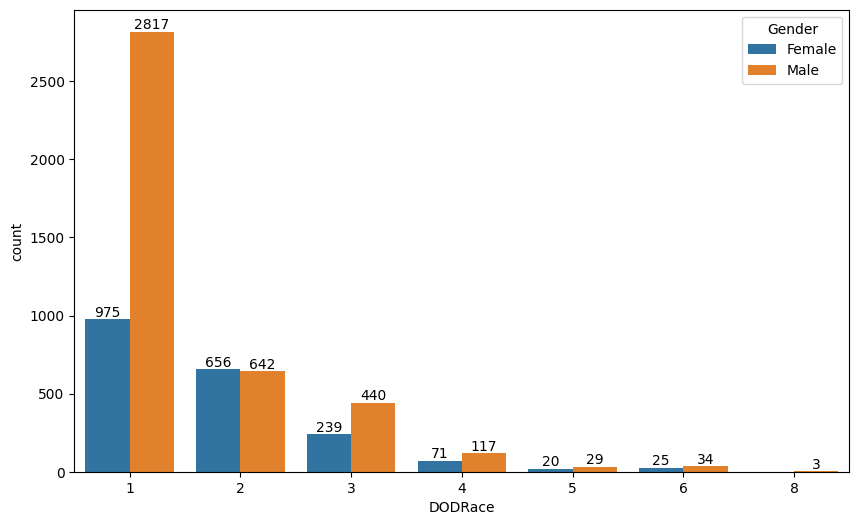

In [41]:
ax = sns.countplot(x="DODRace", data = df, hue = "Gender")
for p in ax.containers:
    ax.bar_label(p)

# distribution by gender

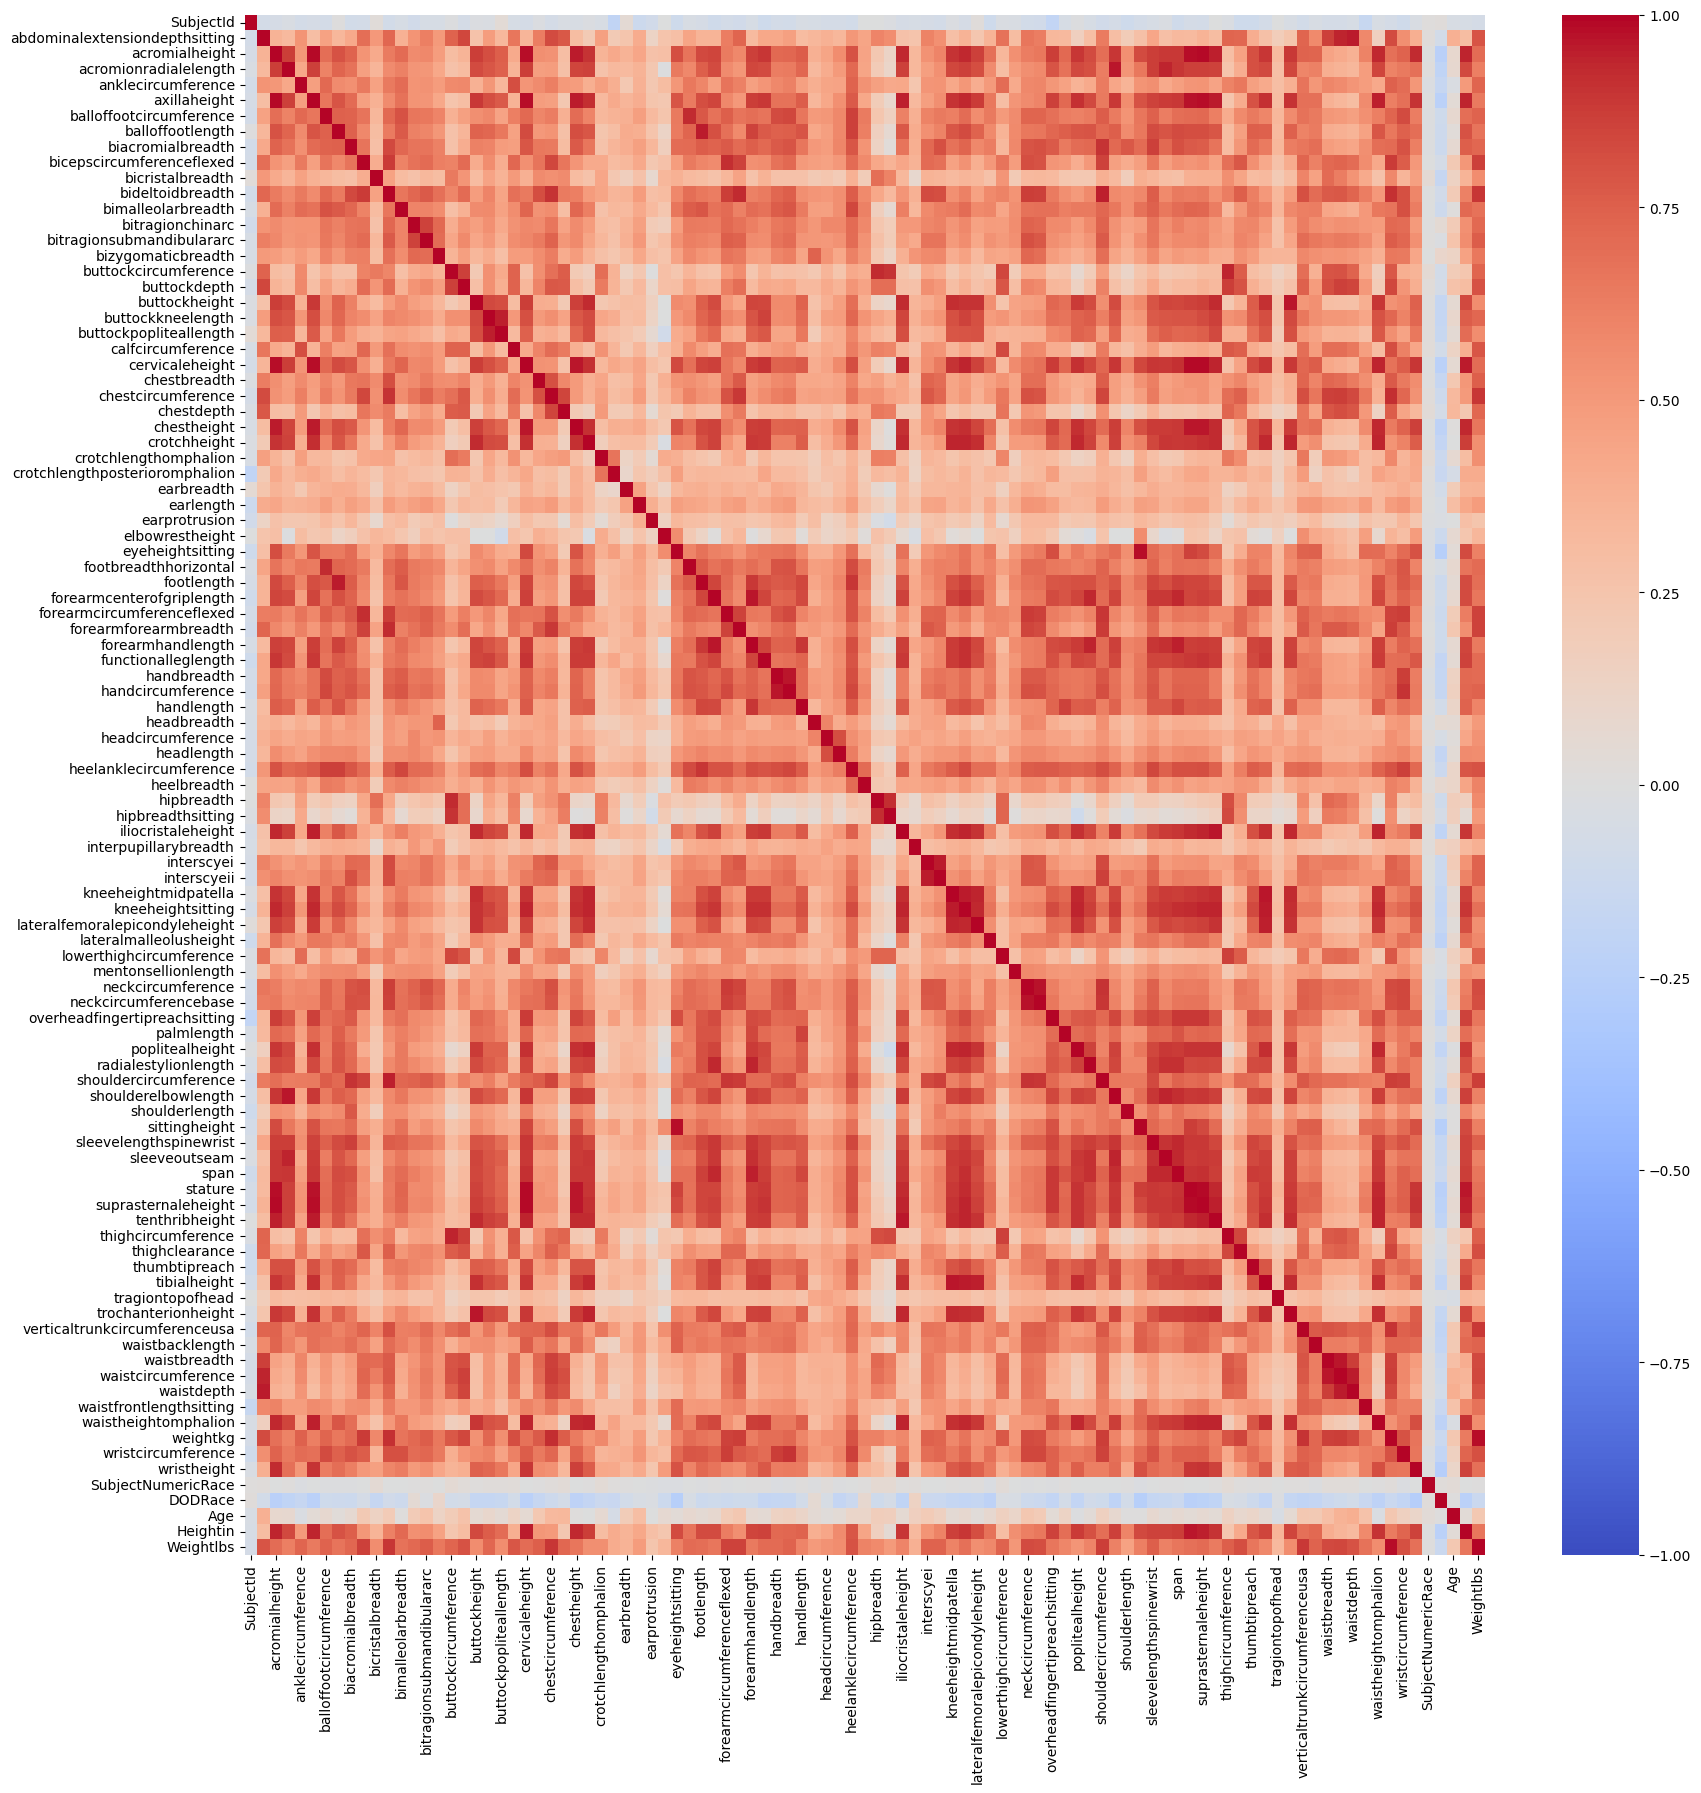

In [42]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm");

# has a multicollinearity issue, but it's fine for logregg with regularisation and non-parametric algorithms.

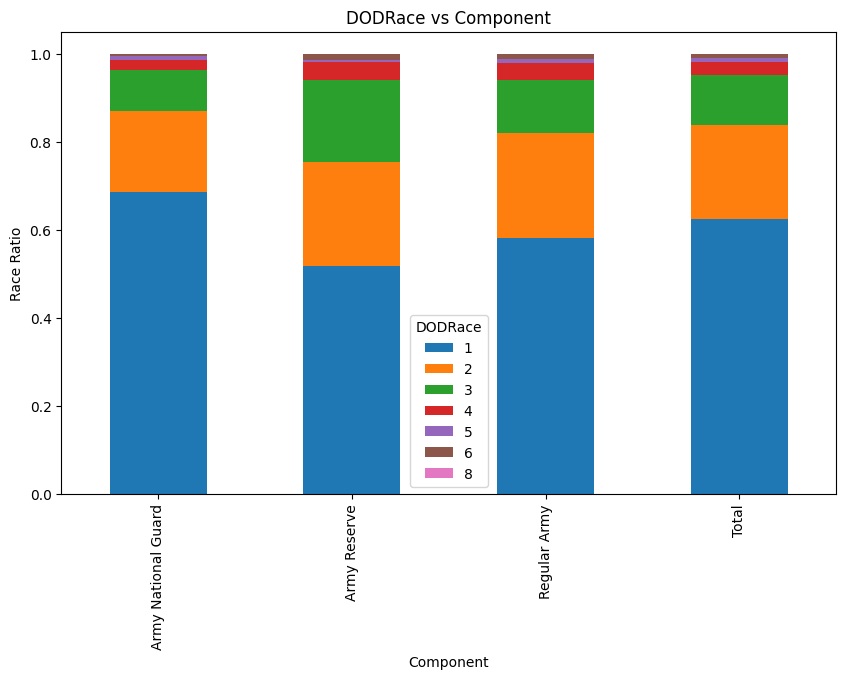

In [43]:
# we want to compare the distribution of the soldiers according to the units they serve(component)
comp_vs_dod = pd.crosstab( df.Component,df.DODRace, margins=True, margins_name="Total", normalize='index')
comp_vs_dod.plot(kind='bar', stacked=True)
plt.title('DODRace vs Component')
plt.xlabel('Component')
plt.ylabel('Race Ratio')
plt.show()

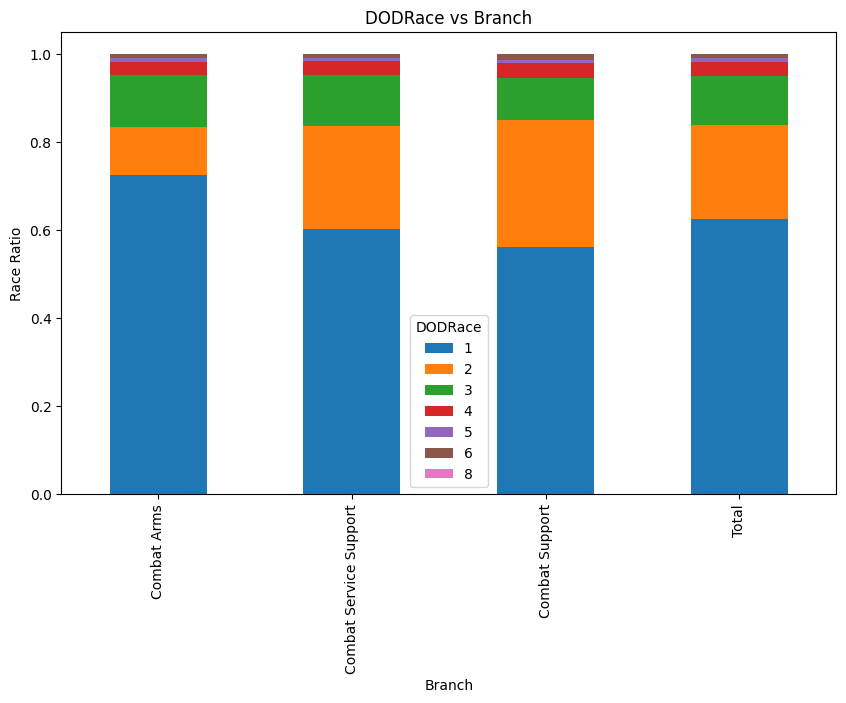

In [44]:
# we want to compare the distribution of the soldiers according to the barnch
brun_vs_dod = pd.crosstab( df.Branch,df.DODRace, margins=True, margins_name="Total", normalize='index')
brun_vs_dod.plot(kind='bar', stacked=True)
plt.title('DODRace vs Branch')
plt.xlabel('Branch')
plt.ylabel('Race Ratio')
plt.show()

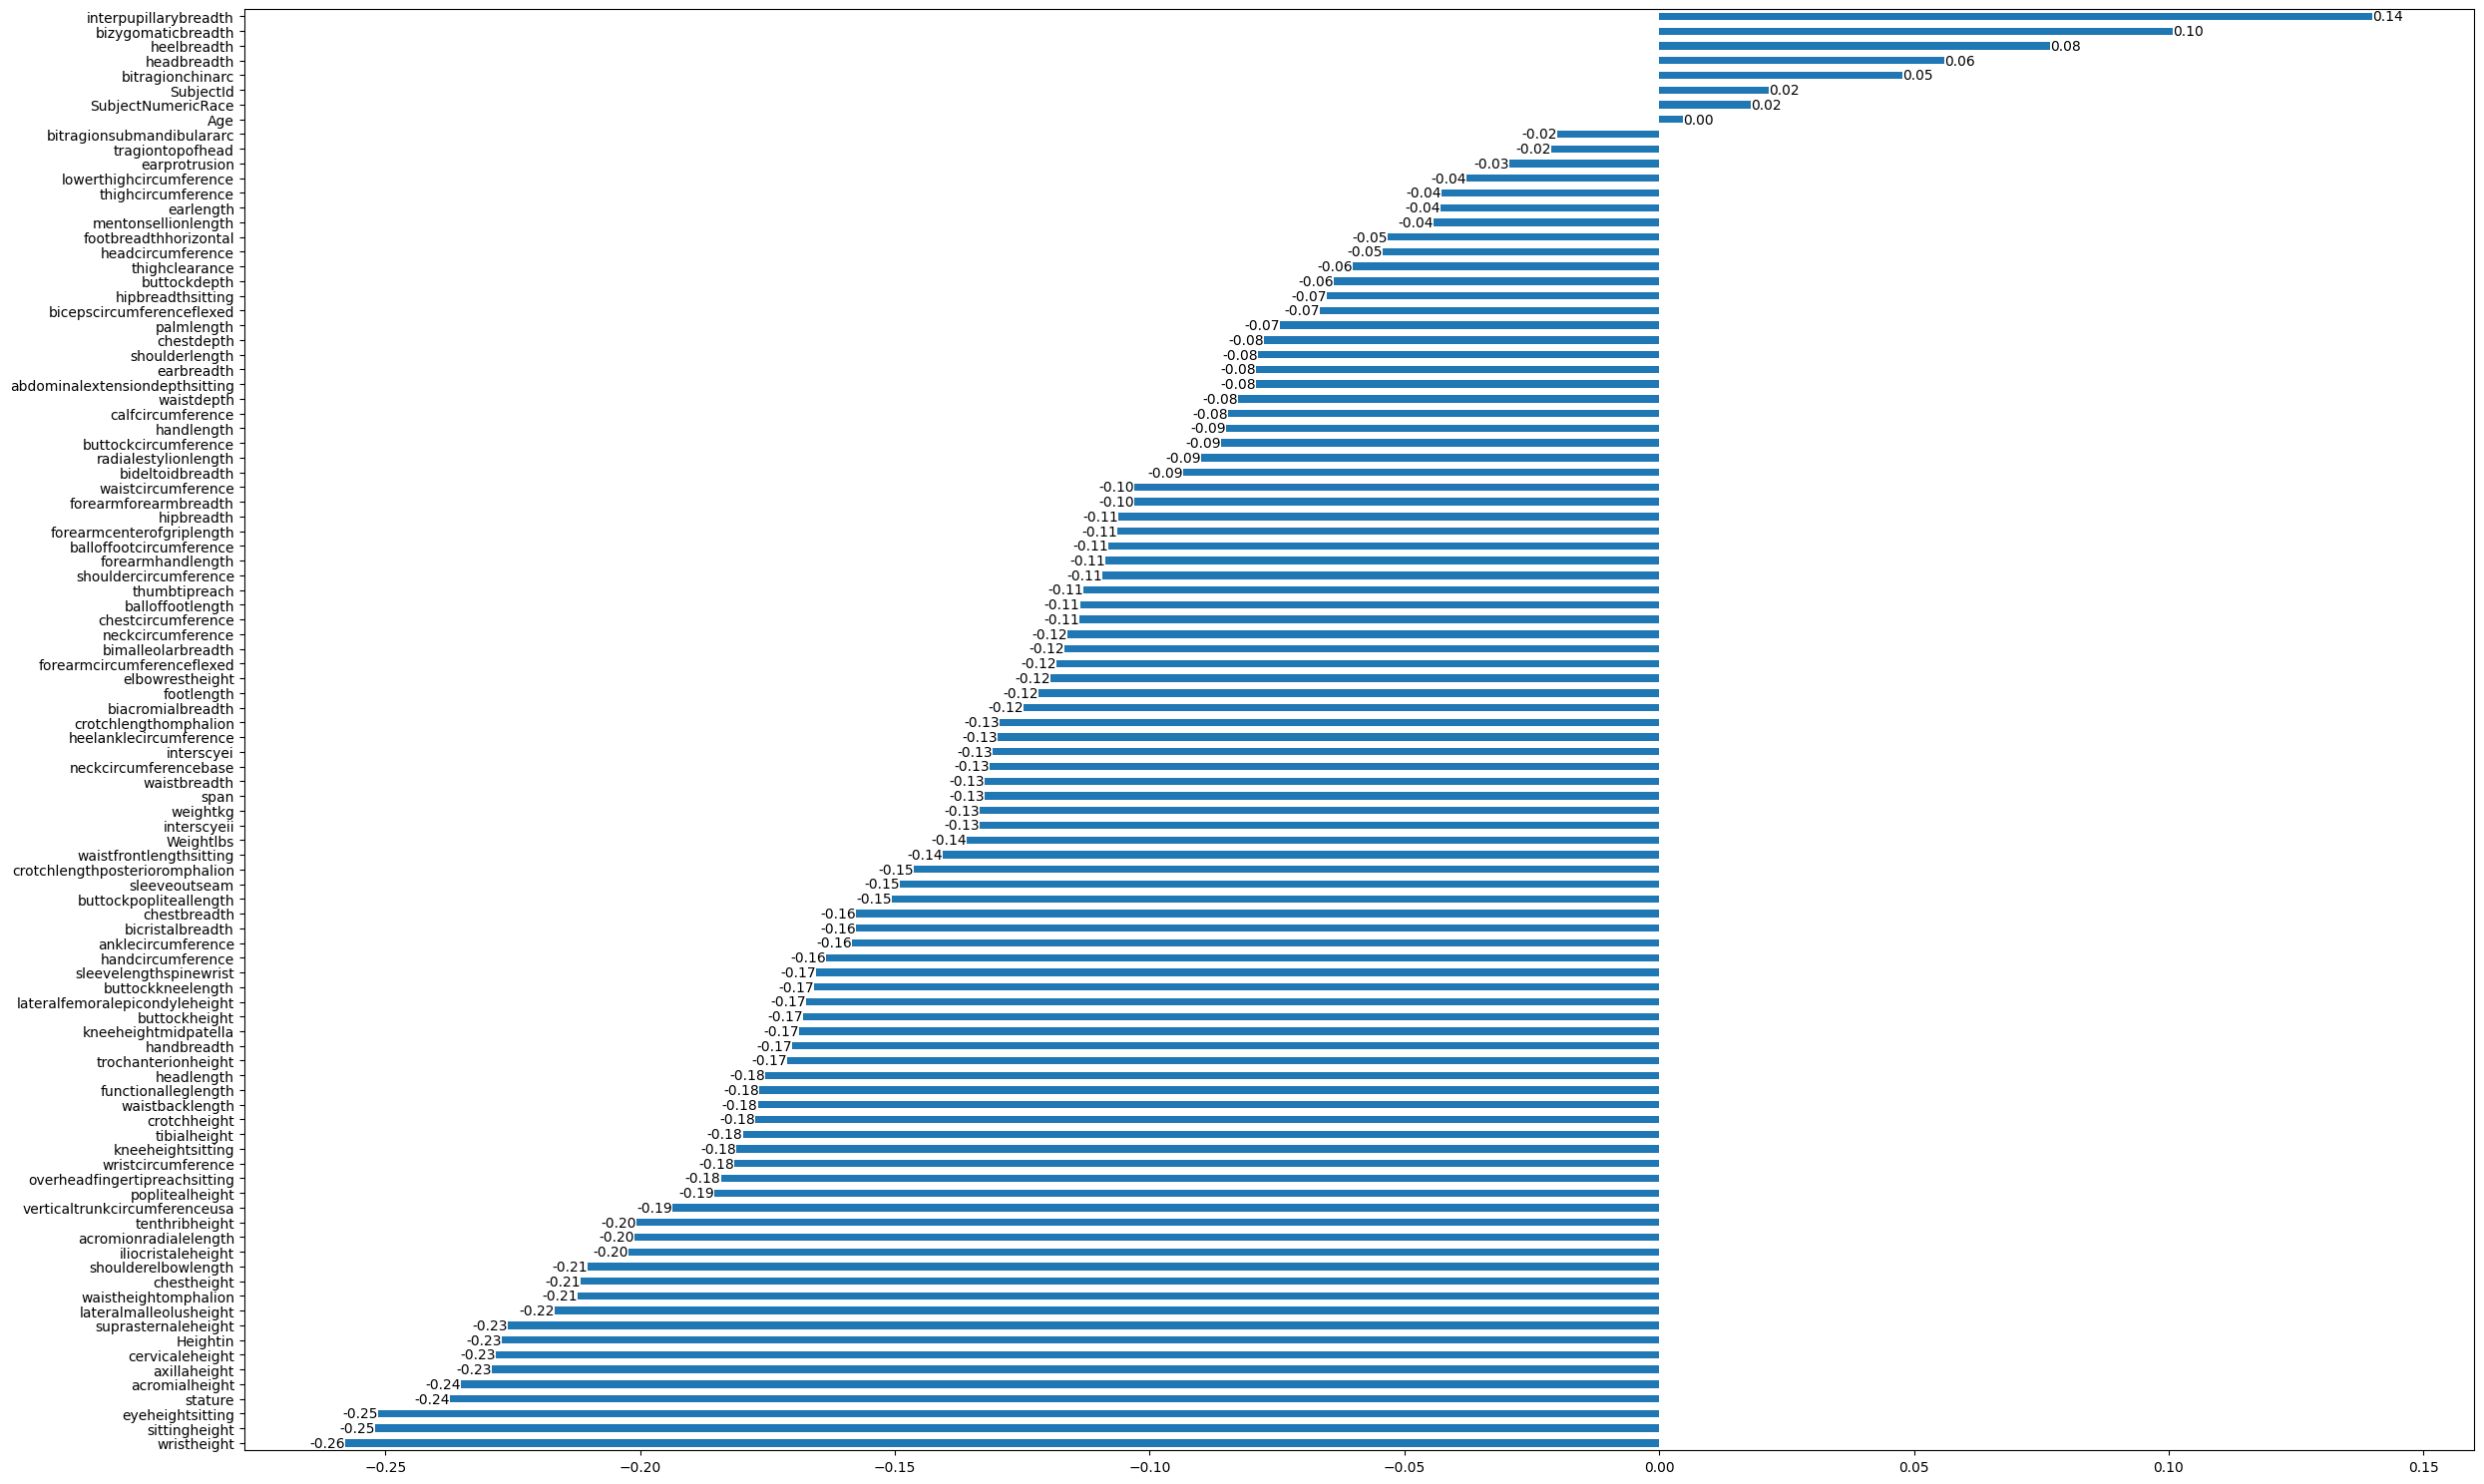

In [45]:
plt.figure(figsize=(25,15))
ax = df.corr(numeric_only=True)["DODRace"].drop("DODRace").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');
plt.tight_layout()

# When we look at the corr, we can see that the features and their relationship with the target variable.

### drop unwanted columns

In [46]:
#Some of the features are irrelevant and some could affect the performance so we will  drop them

#drop 'Ethnicity': most of it is nan
#drop 'WritingPreference', 'Date', 'Installation': irrelevant
#drop 'SubjectId': do not need it
#drop 'Heightin','Weightlbs', "SubjectNumericRace": redundant and self reported

df = df.drop(columns=['SubjectId', 'Ethnicity', 'WritingPreference', 'Date', 'Heightin','Weightlbs','Installation', "SubjectNumericRace"])

### preprocess the target feature

In [47]:
df.DODRace.isna().sum()

0

In [48]:
df.DODRace.value_counts()

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

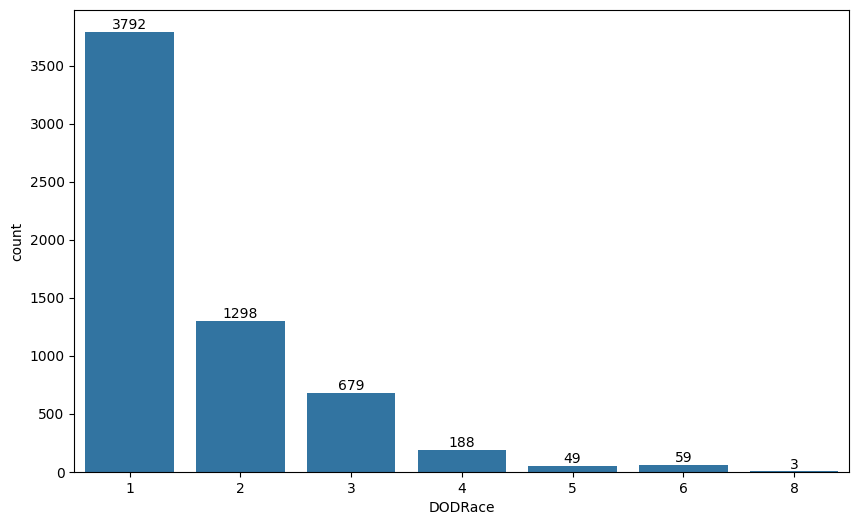

In [49]:
ax = sns.countplot(x='DODRace', data=df)
ax.bar_label(ax.containers[0]);

In [50]:
droped_DOD = (df['DODRace'].value_counts() < 500)
droped_DOD = droped_DOD[droped_DOD].index
droped_DOD

Index([4, 6, 5, 8], dtype='int64', name='DODRace')

In [51]:
#df['DODRace'] = df['DODRace'].replace(unique_DOD, 4)

for i in droped_DOD:
    drop_index = df[df['DODRace'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)
df.sample(2)

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
414                              235            1338                    301   
3541                             273            1505                    348   

      anklecircumference  axillaheight  balloffootcircumference  \
414                  240          1237                      240   
3541                 254          1395                      274   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
414                174                364                        312   
3541               205                431                        404   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
414                262               453                  69   
3541               289               545                  78   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
414                290                        274                 128   
3541               330                        314                 140   

      buttockcircumference  buttockdepth  buttockheight  buttockkneelength  \
414                   1038           224            845                606   
3541                  1085           265            923                636   

      buttockpopliteallength  calfcircumference  cervicaleheight  \
414                      485                420             1413   
3541                     512                407             1586   

      chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  \
414            287                 963         258         1167           776   
3541           284                1102         276         1342           840   

      crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  \
414                     633                             365          29   
3541                    694                             335          35   

      earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
414          57             19              225               758   
3541         68             22              266               860   

      footbreadthhorizontal  footlength  forearmcenterofgriplength  \
414                      95         238                        313   
3541                    104         277                        362   

      forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  \
414                          272                    503                438   
3541                         341                    646                497   

      functionalleglength  handbreadth  handcircumference  handlength  \
414                  1069           83                197         179   
3541                 1159           96                236         206   

      headbreadth  headcircumference  headlength  heelanklecircumference  \
414           144                564         194                     314   
3541          153                583         206                     360   

      heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
414            68         361                406                1009   
3541           82         356                401                1107   

      interpupillarybreadth  interscyei  interscyeii  kneeheightmidpatella  \
414                     575         382          410                   452   
3541                    605         443          465                   475   

      kneeheightsitting  lateralfemoralepicondyleheight  \
414                 508                             456   
3541                574                             495   

      lateralmalleolusheight  lowerthighcircumference  mentonsellionlength  \
414                       62                      412                  109   
3541                      70                      446                  121   

      neckcircumference  neckcircumferencebase  overheadfi

In [52]:
df['DODRace'].value_counts()

DODRace
1    3669
2    1261
3     659
Name: count, dtype: int64

In [53]:
df['DODRace'].nunique()

3

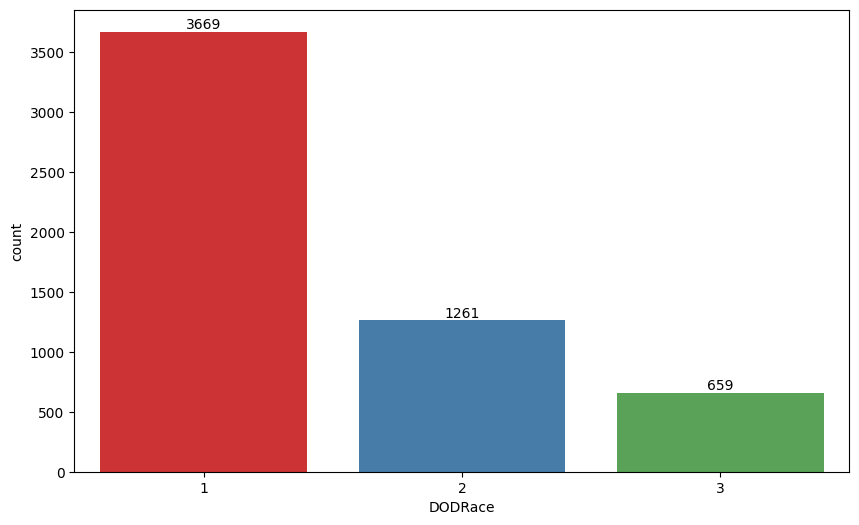

In [54]:
ax = sns.countplot(x='DODRace', data=df, palette = "Set1")
for label in ax.containers:
    ax.bar_label(label)
plt.show()


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
#from category_encoders import BinaryEncoder
from sklearn.compose import make_column_transformer

### spilt the data

In [56]:
x= df.drop(columns='DODRace')
y= df.DODRace

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=101)

In [58]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4471, 99)
Train target shape   :  (4471,)
Test features shape  :  (1118, 99)
Test target shape    :  (1118,)


### Prepare the date for the Encoders

In [59]:
cat = X_train.select_dtypes("object").columns
cat
#here we checking for the categorical data in the x_train to encode it later
#note: we did not use the entire dataset (x_train and y_train) because i want to take the prameters of what the train set is trained on
# and by doing that we wont face a problem like data leakage
# and the pipeline later will do its job by giveing the train: fit_transform and the test: transform

Index(['Gender', 'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation'], dtype='object')

In [60]:
#print the unique values of the categorical col
print("Gender: ", list(df['Gender'].unique()))
print("Component: ", list(df["Component"].unique()))
print("Branch: ", list(df["Branch"].unique()))
print("SubjectsBirthLocation: ", list(df["SubjectsBirthLocation"].unique()))
print("PrimaryMOS: ", list(df["PrimaryMOS"].unique()))

Gender:  ['Female', 'Male']
Component:  ['Regular Army', 'Army National Guard', 'Army Reserve']
Branch:  ['Combat Support', 'Combat Service Support', 'Combat Arms']
SubjectsBirthLocation:  ['Europe', 'California', 'Texas', 'District of Columbia', 'New Mexico', 'Virginia', 'Asia', 'Massachusetts', 'Michigan', 'North America', 'Colorado', 'South Dakota', 'Louisiana', 'Ohio', 'South Carolina', 'Mississippi', 'Illinois', 'West Virginia', 'New York', 'Iowa', 'Florida', 'Oklahoma', 'Pennsylvania', 'North Carolina', 'Alabama', 'Wisconsin', 'Arizona', 'Washington', 'Kentucky', 'Tennessee', 'Kansas', 'Georgia', 'Oregon', 'Delaware', 'Indiana', 'Maryland', 'Hawaii', 'Montana', 'North Dakota', 'South America', 'New Jersey', 'Utah', 'Africa', 'Nevada', 'Missouri', 'Minnesota', 'Idaho', 'Wyoming', 'Nebraska', 'Maine', 'New Hampshire', 'Arkansas', 'Connecticut', 'Rhode Island', 'Vermont', 'Oceania', 'Alaska']
PrimaryMOS:  ['92Y', '25U', '35D', '42A', '88M', '35F', '92F', '31B', 'Other', '25B', '25Q'

In [61]:
#ordinal encoding
cat_for_gender = ['Male', 'Female']
cat_for_Branch = ['Combat Support', 'Combat Arms', 'Combat Service Support' ]
cat_for_comp = ['Army Reserve', 'Regular Army', 'Army National Guard']

ordinal_ordering = [ cat_for_gender, cat_for_Branch, cat_for_comp]
ordincal_cats = ['Gender', 'Branch', 'Component']

#one-hot encoding
onehot_cats = ['SubjectsBirthLocation', "PrimaryMOS"]

#ordinal encoding for DT based algorithms
ordincal_cats_dt = ['Gender', 'Branch', 'Component', 'SubjectsBirthLocation', "PrimaryMOS"]

In [62]:
ordincal_cats = X_train[ordincal_cats].columns
onehot_cats = X_train[onehot_cats].columns
ordincal_cats_dt = X_train[ordincal_cats_dt].columns

In [63]:
numb = X_train.select_dtypes("int64").columns
numb

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
      

In [64]:
stand_scale = StandardScaler()

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
from sklearn.model_selection import StratifiedKFold
from scikitplot.metrics import plot_roc, plot_precision_recall


In [66]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [67]:
# the gridsearch does not accept multi scores, but i can use it the normal cv
my_hisp_scoring = {"precision_Hisp": make_scorer(precision_score, average=None, labels=[3]),
              "recall_Hisp": make_scorer(recall_score, average=None, labels=[3]),
              "f1_Hisp": make_scorer(f1_score, average=None, labels=[3])}

#recall_hisp = make_scorer(recall_score, average = None, labels = 3) #if i want to use or increase the recall
f1_hisp = make_scorer(f1_score, average = None, labels = [3])#a reasonable openion said: sometimes we don't know which metric is more important to the clinet
                                                           # and logically even if we want to have a high value of recall, we should at least get a relativly acceptable value of precision
                                                           # so the f1 is middle solution between these two, however it always depend on your problem and what are you looking for

#scoring for xgboost
# in the xgb we re arranged the class indexes and the hispanic class has the index of 2 now
my_hisp_scoring_xgb = {"precision_Hisp": make_scorer(precision_score, average=None, labels=[2]),
                       "recall_Hisp": make_scorer(recall_score, average=None, labels=[2]),
                      "f1_Hisp": make_scorer(f1_score, average=None, labels=[2])}

f1_hisp_xgb = make_scorer(f1_score, average = None, labels = [2])

## 1. Logistic model

In [180]:
'''
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), onehot_cats),
                        (StandardScaler(), numb ),
                         remainder='passthrough',
                         verbose_feature_names_out=False)
'''

#the other way of encodeing and scaling
column_trans_logi = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), onehot_cats),
                        (OrdinalEncoder(categories=ordinal_ordering, handle_unknown="use_encoded_value", unknown_value=-1), ordincal_cats),
                         remainder='passthrough',
                         verbose_feature_names_out=False)

In [69]:
from sklearn.linear_model import LogisticRegression

### Vanilla Logistic Model

In [70]:
#operations = [("scaler", column_trans), ("logistic", LogisticRegression())]
operations = [("cat_scaler", column_trans_logi),
              ("num_scaler", stand_scale),
              ("logistic", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101))]

pipe_logis = Pipeline(steps=operations)

pipe_logis.fit(X_train, y_train)

Pipeline(steps=[('cat_scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation', 'PrimaryMOS'], dtype='object')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Combat '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Arms',
                                                                              'Combat '
                                                                              'Service '
                                                                              'Support'],
                                                                             ['Army '
                                                                              'Reserve',
                                                                              'Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Branch', 'Component'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('num_scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [71]:
y_pred = pipe_logis.predict(X_test)
y_pred

array([2, 1, 3, ..., 1, 2, 3], dtype=int64)

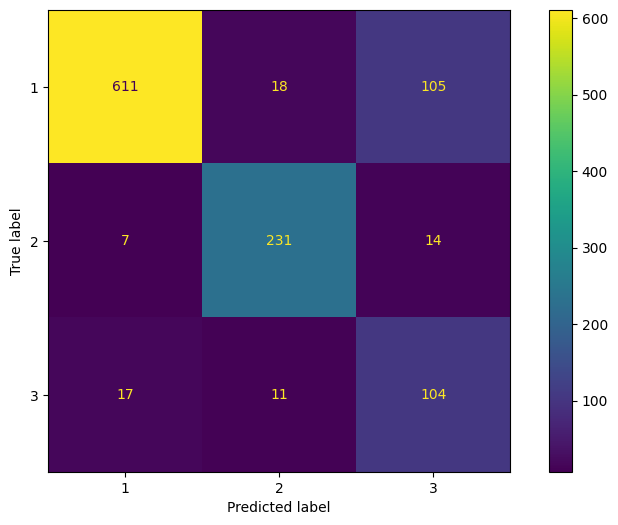

In [72]:
ConfusionMatrixDisplay.from_estimator(pipe_logis, X_test, y_test);

In [73]:
eval_metric(pipe_logis, X_train, y_train, X_test, y_test)

Test_Set
[[611  18 105]
 [  7 231  14]
 [ 17  11 104]]
              precision    recall  f1-score   support

           1       0.96      0.83      0.89       734
           2       0.89      0.92      0.90       252
           3       0.47      0.79      0.59       132

    accuracy                           0.85      1118
   macro avg       0.77      0.85      0.79      1118
weighted avg       0.89      0.85      0.86      1118


Train_Set
[[2529   62  344]
 [  23  942   44]
 [  54   19  454]]
              precision    recall  f1-score   support

           1       0.97      0.86      0.91      2935
           2       0.92      0.93      0.93      1009
           3       0.54      0.86      0.66       527

    accuracy                           0.88      4471
   macro avg       0.81      0.89      0.83      4471
weighted avg       0.91      0.88      0.89      4471



#### with cv

In [74]:
#operations = [("scaler", column_trans), ("logistic", LogisticRegression())]
operations = [("cat_scaler", column_trans_logi),
              ("num_scaler", stand_scale),
              ("logistic", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101))]

log_cv_model = Pipeline(steps=operations)

cv_strat = StratifiedKFold(n_splits=10) # In each iteration, divides labels according to their ratio in train and in test sets
                                        # however, i do not need to do this anymore because in latest version they modified it to do the stratify everytime in the cv as long as it is int

scores = cross_validate(log_cv_model, X_train, y_train,
                        #scoring = ['accuracy', 'precision_weighted','recall_weighted', 'f1_weighted'],
                        #scoring = ['accuracy', 'precision_macro','recall_macro', 'f1_macro'], #my mentor Mr.orion said: it's much better to use macro over weighted in our case
                                                                                              #because weighted give the majority class more weight where macro does not
                        scoring = my_hisp_scoring,                                                            
                        cv = cv_strat,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hisp    0.478
train_precision_Hisp   0.545
test_recall_Hisp       0.751
train_recall_Hisp      0.865
test_f1_Hisp           0.584
train_f1_Hisp          0.669
dtype: float64

### Logistic Model GridsearchCV

In [75]:
pipe_logis.get_params()

{'memory': None,
 'steps': [('cat_scaler',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    Index(['SubjectsBirthLocation', 'PrimaryMOS'], dtype='object')),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Male', 'Female'],
                                                               ['Combat Support',
                                                                'Combat Arms',
                                                                'Combat Service '
                                                                'Support'],
                                                               ['Army Reserve',
                                                                'Regular Army',
 

In [76]:
#do the grid search and try these values that i give it to you and choose the best one
#penalty = ["l1", "l2"]
C = [0.01, 0.1, 1]
class_weight= ["balanced", None, {1:1, 2:2.9, 3:5.5}]
solver = ["lbfgs", "sag", "saga"]

In [77]:
param_grid = {"logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}
              #'logistic__penalty':penalty}

#cv_strat = StratifiedKFold(n_splits=10) 

grid_model_logis = GridSearchCV(estimator=pipe_logis,
                          param_grid=param_grid,
                          cv=10,
                          scoring = f1_hisp, 
                          n_jobs = -1,
                          return_train_score=True)

In [78]:
grid_model_logis.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('cat_scaler',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['SubjectsBirthLocation', 'PrimaryMOS'], dtype='object')),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Male',
                                                                                                     'Female'],
                                                                                                    ['Combat '
                                                                                                     'Support',
                                                                                                     'Combat '
                                                                                                     'Arms',
                                                                                                     'Combat...
                                       ('num_scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1],
                         'logistic__class_weight': ['balanced', None,
                                                    {1: 1, 2: 2.9, 3: 5.5}],
                         'logistic__solver': ['lbfgs', 'sag', 'saga']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [79]:
grid_model_logis.best_params_

{'logistic__C': 0.1,
 'logistic__class_weight': None,
 'logistic__solver': 'lbfgs'}

In [80]:
grid_model_logis.best_estimator_

Pipeline(steps=[('cat_scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation', 'PrimaryMOS'], dtype='object')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Combat '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Arms',
                                                                              'Combat '
                                                                              'Service '
                                                                              'Support'],
                                                                             ['Army '
                                                                              'Reserve',
                                                                              'Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Branch', 'Component'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('num_scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, max_iter=10000, random_state=101))])

In [81]:
pd.DataFrame(grid_model_logis.cv_results_).loc[grid_model_logis.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.629
mean_train_score   0.691
Name: 12, dtype: object

In [82]:
y_pred = grid_model_logis.predict(X_test)
y_pred

array([2, 1, 3, ..., 1, 2, 1], dtype=int64)

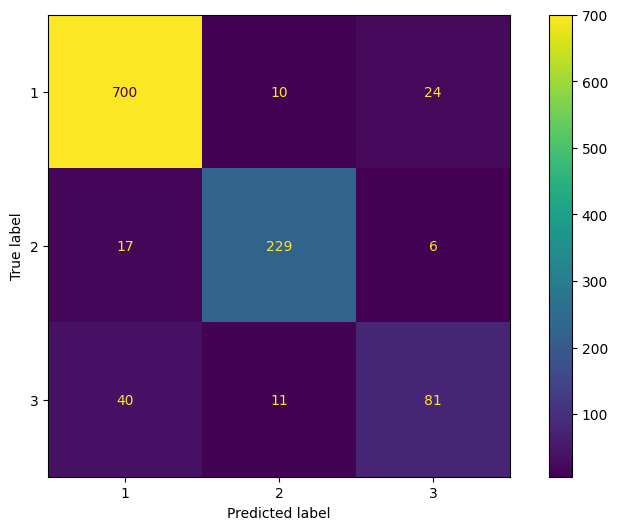

In [83]:
ConfusionMatrixDisplay.from_estimator(grid_model_logis, X_test, y_test);

In [84]:
eval_metric(grid_model_logis, X_train, y_train, X_test, y_test)

Test_Set
[[700  10  24]
 [ 17 229   6]
 [ 40  11  81]]
              precision    recall  f1-score   support

           1       0.92      0.95      0.94       734
           2       0.92      0.91      0.91       252
           3       0.73      0.61      0.67       132

    accuracy                           0.90      1118
   macro avg       0.86      0.83      0.84      1118
weighted avg       0.90      0.90      0.90      1118


Train_Set
[[2839   23   73]
 [  52  936   21]
 [ 173   29  325]]
              precision    recall  f1-score   support

           1       0.93      0.97      0.95      2935
           2       0.95      0.93      0.94      1009
           3       0.78      0.62      0.69       527

    accuracy                           0.92      4471
   macro avg       0.88      0.84      0.86      4471
weighted avg       0.91      0.92      0.91      4471



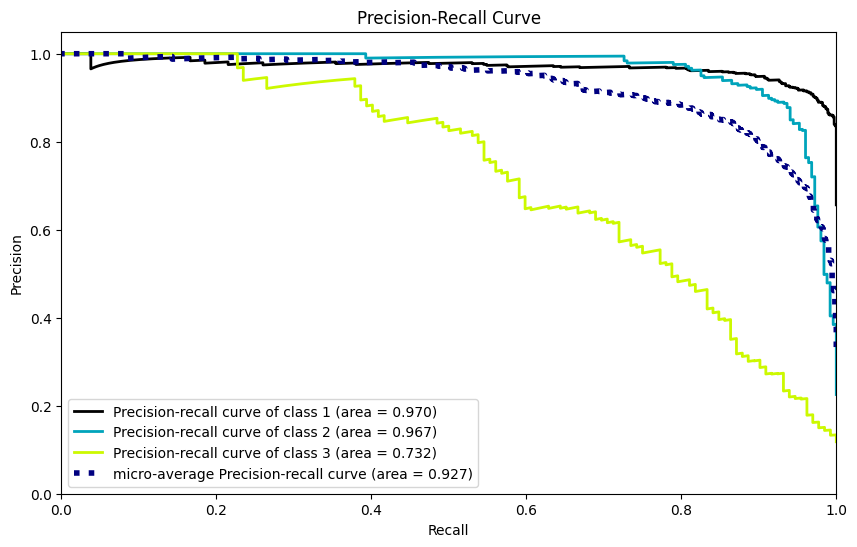

In [85]:
operations = [("cat_scaler", column_trans_logi),
              ("num_scaler", stand_scale),
              ("logistic", LogisticRegression(class_weight="balanced", C=0.1, max_iter=10000, random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [86]:
# we can't use the average_precision_score function with the y_test variable because it's not a binary

y_test_dummies = pd.get_dummies(y_test).values  # we do that for the sake of the average_precision_score function.

average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2])

# Returns 1 black, 2 hispanic, 0 white scores.
# We got hispanic scores by specifying 2 here.

0.7321546880203933

In [87]:
y_pred = grid_model_logis.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2])
log_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
log_recall = recall_score(y_test, y_pred, average=None, labels=[3])

# Since we will compare the scores we got from all models in the table below,
# we assign model scores to the variables.

## 2. SVC

In [88]:
from sklearn.svm import SVC

In [89]:
column_trans_svc = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), onehot_cats),
                        (OrdinalEncoder(categories=ordinal_ordering, handle_unknown="use_encoded_value", unknown_value=-1), ordincal_cats),
                         remainder='passthrough',
                         verbose_feature_names_out=False)

### Vanilla SVC model

In [90]:
operations = [("cat_scaler", column_trans_svc),
              ("num_scaler", stand_scale), 
              ("SVC", SVC(class_weight="balanced", random_state=101))]

pipe_svm = Pipeline(steps=operations)

In [91]:
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('cat_scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation', 'PrimaryMOS'], dtype='object')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Combat '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Arms',
                                                                              'Combat '
                                                                              'Service '
                                                                              'Support'],
                                                                             ['Army '
                                                                              'Reserve',
                                                                              'Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Branch', 'Component'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('num_scaler', StandardScaler()),
                ('SVC', SVC(class_weight='balanced', random_state=101))])

In [92]:
eval_metric(pipe_svm, X_train, y_train, X_test, y_test)

Test_Set
[[644  14  76]
 [ 19 221  12]
 [ 22   7 103]]
              precision    recall  f1-score   support

           1       0.94      0.88      0.91       734
           2       0.91      0.88      0.89       252
           3       0.54      0.78      0.64       132

    accuracy                           0.87      1118
   macro avg       0.80      0.84      0.81      1118
weighted avg       0.89      0.87      0.87      1118


Train_Set
[[2678   23  234]
 [  20  972   17]
 [  21    6  500]]
              precision    recall  f1-score   support

           1       0.98      0.91      0.95      2935
           2       0.97      0.96      0.97      1009
           3       0.67      0.95      0.78       527

    accuracy                           0.93      4471
   macro avg       0.87      0.94      0.90      4471
weighted avg       0.94      0.93      0.93      4471



#### with cv

In [93]:
operations = [("cat_scaler", column_trans_svc),
              ("num_scaler", stand_scale), 
              ("SVC", SVC(class_weight="balanced", random_state=101))]

svm_cv_model = Pipeline(steps=operations)

scores = cross_validate(svm_cv_model,
                        X_train,
                        y_train,
                        scoring = my_hisp_scoring,                                  
                        cv = cv_strat,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hisp    0.511
train_precision_Hisp   0.669
test_recall_Hisp       0.688
train_recall_Hisp      0.951
test_f1_Hisp           0.585
train_f1_Hisp          0.785
dtype: float64

###  SVC Model GridsearchCV 

In [94]:
param_grid = {'SVC__C': [0.01, 0.1, 1],
              'SVC__gamma': ["scale", "auto", 0.2],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]}

In [95]:
operations = [("cat_scaler", column_trans_svc),
              ("num_scaler", stand_scale), 
              ("SVC", SVC(random_state=101))]

svm_model_pip = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(estimator=svm_model_pip,
                              param_grid=param_grid,
                              scoring = f1_hisp,
                              cv=10,
                              n_jobs = -1,
                              return_train_score=True)

In [96]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('cat_scaler',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['SubjectsBirthLocation', 'PrimaryMOS'], dtype='object')),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Male',
                                                                                                     'Female'],
                                                                                                    ['Combat '
                                                                                                     'Support',
                                                                                                     'Combat '
                                                                                                     'Arms',
                                                                                                     'Combat...
                                                                         Index(['Gender', 'Branch', 'Component'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('num_scaler', StandardScaler()),
                                       ('SVC', SVC(random_state=101))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 0.1, 1],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': ['scale', 'auto', 0.2],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [97]:
svm_model_grid.best_estimator_

Pipeline(steps=[('cat_scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation', 'PrimaryMOS'], dtype='object')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Combat '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Arms',
                                                                              'Combat '
                                                                              'Service '
                                                                              'Support'],
                                                                             ['Army '
                                                                              'Reserve',
                                                                              'Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Branch', 'Component'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('num_scaler', StandardScaler()),
                ('SVC', SVC(C=0.1, kernel='linear', random_state=101))])

In [98]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.625
mean_train_score   0.707
Name: 19, dtype: object

In [99]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[701  14  19]
 [ 17 229   6]
 [ 44  10  78]]
              precision    recall  f1-score   support

           1       0.92      0.96      0.94       734
           2       0.91      0.91      0.91       252
           3       0.76      0.59      0.66       132

    accuracy                           0.90      1118
   macro avg       0.86      0.82      0.84      1118
weighted avg       0.90      0.90      0.90      1118


Train_Set
[[2852   20   63]
 [  52  940   17]
 [ 170   26  331]]
              precision    recall  f1-score   support

           1       0.93      0.97      0.95      2935
           2       0.95      0.93      0.94      1009
           3       0.81      0.63      0.71       527

    accuracy                           0.92      4471
   macro avg       0.90      0.84      0.87      4471
weighted avg       0.92      0.92      0.92      4471



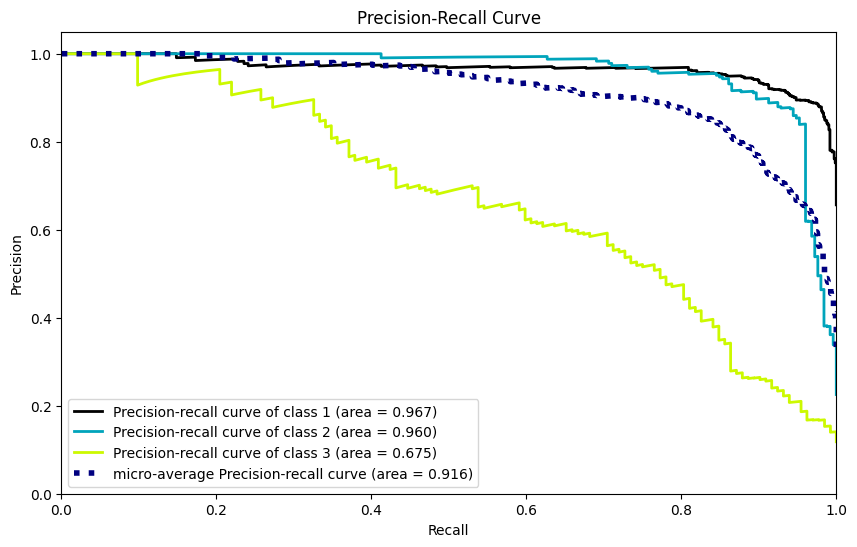

In [100]:
operations = [("cat_scaler", column_trans_svc),
              ("num_scaler", stand_scale), 
              ("SVC", SVC(C=0.1, kernel='linear', random_state=101, class_weight="balanced"))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [101]:
average_precision_score(y_test_dummies[:, 2], decision_function[:, 2])

0.6747280011016081

In [102]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 2], decision_function[:, 2])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
svc_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## 3. RF

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans_RF = make_column_transformer((ord_enc, ordincal_cats_dt),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

### Vanilla RF Model

In [105]:
#operations = [("OrdinalEncoder", column_trans_RF),
#              ("RF_model", RandomForestClassifier(class_weight={1:1, 2:2.9, 3:5.5},random_state=101))]

operations = [("OrdinalEncoder", column_trans_RF),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_RF = Pipeline(steps=operations)

pipe_RF.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Branch', 'Component', 'SubjectsBirthLocation', 'PrimaryMOS'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [106]:
eval_metric(pipe_RF, X_train, y_train, X_test, y_test)

Test_Set
[[726   7   1]
 [ 88 164   0]
 [118   5   9]]
              precision    recall  f1-score   support

           1       0.78      0.99      0.87       734
           2       0.93      0.65      0.77       252
           3       0.90      0.07      0.13       132

    accuracy                           0.80      1118
   macro avg       0.87      0.57      0.59      1118
weighted avg       0.83      0.80      0.76      1118


Train_Set
[[2935    0    0]
 [   0 1009    0]
 [   0    0  527]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2935
           2       1.00      1.00      1.00      1009
           3       1.00      1.00      1.00       527

    accuracy                           1.00      4471
   macro avg       1.00      1.00      1.00      4471
weighted avg       1.00      1.00      1.00      4471



#### with cv

In [107]:
operations = [("OrdinalEncoder", column_trans_RF),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

RF_cv_model = Pipeline(steps=operations)

scores = cross_validate(RF_cv_model,
                        X_train,
                        y_train,
                        scoring= my_hisp_scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hisp    0.883
train_precision_Hisp   1.000
test_recall_Hisp       0.034
train_recall_Hisp      1.000
test_f1_Hisp           0.065
train_f1_Hisp          1.000
dtype: float64

### RF Model GridsearchCV 

In [108]:
pipe_RF.get_params()

{'memory': None,
 'steps': [('OrdinalEncoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    Index(['Gender', 'Branch', 'Component', 'SubjectsBirthLocation', 'PrimaryMOS'], dtype='object'))],
                     verbose_feature_names_out=False)),
  ('RF_model',
   RandomForestClassifier(class_weight='balanced', random_state=101))],
 'verbose': False,
 'OrdinalEncoder': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinalencoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  Index(['Gender', 'Branch', 'Component', 'SubjectsBirthLocation', 'PrimaryMOS'], dtype='object'))],

In [109]:
param_grid = {'RF_model__n_estimators':[200, 400, 500],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             #'RF_model__min_samples_split':[2,3,4],
             #'RF_model__min_samples_leaf': [2,3,4],
             #'RF_model__max_samples':[0.8, 1],
             'RF_model__class_weight': [{1:1, 2:2.9, 3:5.5}, "balanced"]}

rf_grid_model = GridSearchCV(estimator=pipe_RF,
                             param_grid=param_grid,
                             scoring= f1_hisp,
                             cv= 10,
                             n_jobs = -1,
                             return_train_score=True)

In [110]:
rf_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'Branch', 'Component', 'SubjectsBirthLocation', 'PrimaryMOS'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__class_weight': [{1: 1, 2: 2.9, 3: 5.5},
                                                    'balanced'],
                         'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__n_estimators': [200, 400, 500]},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [111]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Branch', 'Component', 'SubjectsBirthLocation', 'PrimaryMOS'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        n_estimators=500, random_state=101))])

In [112]:
pd.DataFrame(rf_grid_model.cv_results_).loc[rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.324
mean_train_score   0.378
Name: 53, dtype: object

In [113]:
rf_grid_model.best_score_

0.32360604522129494

In [114]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[432  49 253]
 [ 12 189  51]
 [ 26  13  93]]
              precision    recall  f1-score   support

           1       0.92      0.59      0.72       734
           2       0.75      0.75      0.75       252
           3       0.23      0.70      0.35       132

    accuracy                           0.64      1118
   macro avg       0.64      0.68      0.61      1118
weighted avg       0.80      0.64      0.68      1118


Train_Set
[[1730  220  985]
 [  65  829  115]
 [ 107   50  370]]
              precision    recall  f1-score   support

           1       0.91      0.59      0.72      2935
           2       0.75      0.82      0.79      1009
           3       0.25      0.70      0.37       527

    accuracy                           0.66      4471
   macro avg       0.64      0.70      0.62      4471
weighted avg       0.80      0.66      0.69      4471



class_weight='balanced', max_depth=4, n_estimators=500,
                       random_state=101

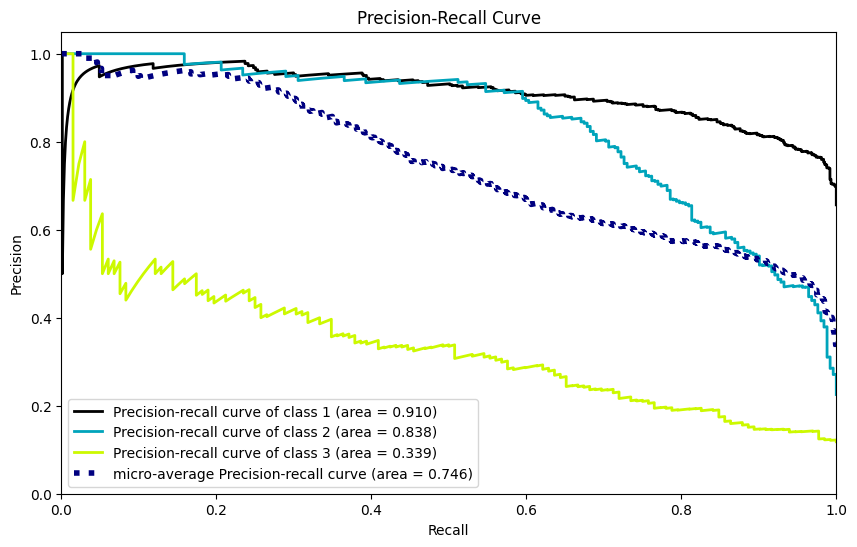

In [115]:
operations_rf = [("OrdinalEncoder", column_trans_RF),
                 ("RF_model",RandomForestClassifier(class_weight="balanced",
                                                    max_depth=4, 
                                                    n_estimators=500,
                                                    random_state=101))]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [116]:
average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2])

0.3391999614222013

In [117]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
rf_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## 4. XGBoost

pip install xgboost==1.7.3

In [118]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.utils import class_weight

In [119]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans_xg = make_column_transformer((ord_enc, ordincal_cats_dt),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [120]:
#xgboost needs to be encoded like [0, 1, 2, ...]
lab_enc = LabelEncoder()
y_train_xg = lab_enc.fit_transform(y_train)
y_test_xg = lab_enc.transform(y_test)

### Vanilla XGBoost Model

In [121]:
operations = [("OrdinalEncoder", column_trans_xg),
              ("xg_model", XGBClassifier(random_state=101))]

pipe_xg = Pipeline(steps=operations)

In [122]:
pipe_xg.fit(X_train, y_train_xg)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Branch', 'Component', 'SubjectsBirthLocation', 'PrimaryMOS'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('xg_model',
                 XGBClassifier(base_score=None, boost...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [123]:
eval_metric(pipe_xg, X_train, y_train_xg, X_test, y_test_xg)

Test_Set
[[708  15  11]
 [ 30 215   7]
 [ 55   9  68]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       734
           1       0.90      0.85      0.88       252
           2       0.79      0.52      0.62       132

    accuracy                           0.89      1118
   macro avg       0.86      0.78      0.81      1118
weighted avg       0.88      0.89      0.88      1118


Train_Set
[[2935    0    0]
 [   0 1009    0]
 [   0    0  527]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2935
           1       1.00      1.00      1.00      1009
           2       1.00      1.00      1.00       527

    accuracy                           1.00      4471
   macro avg       1.00      1.00      1.00      4471
weighted avg       1.00      1.00      1.00      4471



#### XGBoost with class weight

In [124]:
pipe_xg.get_params()

{'memory': None,
 'steps': [('OrdinalEncoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    Index(['Gender', 'Branch', 'Component', 'SubjectsBirthLocation', 'PrimaryMOS'], dtype='object'))],
                     verbose_feature_names_out=False)),
  ('xg_model',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_t

In [125]:
classes_weights = class_weight.compute_sample_weight(class_weight="balanced", y=y_train_xg)
classes_weights

# XGboost algorithm has no class_weight hyperparameter for multiclass.
# We can use the sample_weight hyperparameter within the fit function.

array([2.82795699, 0.50777967, 0.50777967, ..., 0.50777967, 0.50777967,
       0.50777967])

In [126]:
my_dict = {"weights": classes_weights, "label": y_train_xg}

comp = pd.DataFrame(my_dict)

comp.head()

weights  label
0    2.828      2
1    0.508      0
2    0.508      0
3    0.508      0
4    2.828      2

In [127]:
comp.groupby("label").value_counts()

# weight x class will give us the same results.

label  weights
0      0.508      2935
1      1.477      1009
2      2.828       527
Name: count, dtype: int64

In [128]:
pipe_xg.fit(X_train, y_train_xg, xg_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore,
# we need to assign the weight of each class to its instances,
# which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Branch', 'Component', 'SubjectsBirthLocation', 'PrimaryMOS'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('xg_model',
                 XGBClassifier(base_score=None, boost...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [129]:
eval_metric(pipe_xg, X_train, y_train_xg, X_test, y_test_xg)

Test_Set
[[709   9  16]
 [ 28 219   5]
 [ 50   9  73]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       734
           1       0.92      0.87      0.90       252
           2       0.78      0.55      0.65       132

    accuracy                           0.90      1118
   macro avg       0.87      0.80      0.82      1118
weighted avg       0.89      0.90      0.89      1118


Train_Set
[[2935    0    0]
 [   0 1009    0]
 [   0    0  527]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2935
           1       1.00      1.00      1.00      1009
           2       1.00      1.00      1.00       527

    accuracy                           1.00      4471
   macro avg       1.00      1.00      1.00      4471
weighted avg       1.00      1.00      1.00      4471



#### with cv

In [130]:
operations = [("OrdinalEncoder", column_trans_xg),
              ("xg_model", XGBClassifier(random_state=101))]

xg_cv_model = Pipeline(steps=operations)

scores = cross_validate(xg_cv_model,
                        X_train,
                        y_train_xg,
                        scoring=my_hisp_scoring_xgb,
                        cv = 5,
                        return_train_score=True,
                        fit_params={"xg_model__sample_weight": classes_weights})

df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hisp    0.699
train_precision_Hisp   1.000
test_recall_Hisp       0.427
train_recall_Hisp      1.000
test_f1_Hisp           0.530
train_f1_Hisp          1.000
dtype: float64

### XGBoost Model GridsearchCV

In [131]:
pipe_xg.get_params()

{'memory': None,
 'steps': [('OrdinalEncoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    Index(['Gender', 'Branch', 'Component', 'SubjectsBirthLocation', 'PrimaryMOS'], dtype='object'))],
                     verbose_feature_names_out=False)),
  ('xg_model',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_t

In [132]:
param_grid = {'xg_model__n_estimators':[30, 40],
              'xg_model__max_depth':[1,2,3],
              'xg_model__learning_rate': [0.03, 0.05],
              'xg_model__subsample':[0.8, 1],
              'xg_model__colsample_bytree':[0.85, 1]} 

In [133]:
operations = [("OrdinalEncoder", column_trans_xg),
              ("xg_model", XGBClassifier(random_state=42))]

xg_model = Pipeline(steps=operations)

xg_grid = GridSearchCV(estimator=xg_model,
                    param_grid=param_grid,
                    scoring = f1_hisp_xgb,
                    cv=5,
                    n_jobs=-1,
                    return_train_score=True)

In [134]:
xg_grid.fit(X_train, y_train_xg, xg_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'Branch', 'Component', 'SubjectsBirthLocation', 'PrimaryMOS'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('xg_model',
                                        XGBClas...
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xg_model__colsample_bytree': [0.85, 1],
                         'xg_model__learning_rate': [0.03, 0.05],
                         'xg_model__max_depth': [1, 2, 3],
                         'xg_model__n_estimators': [30, 40],
                         'xg_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[2]))

In [135]:
xg_grid.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Branch', 'Component', 'SubjectsBirthLocation', 'PrimaryMOS'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('xg_model',
                 XGBClassifier(base_score=None, boost...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [136]:
xg_grid.best_params_

{'xg_model__colsample_bytree': 0.85,
 'xg_model__learning_rate': 0.05,
 'xg_model__max_depth': 3,
 'xg_model__n_estimators': 40,
 'xg_model__subsample': 0.8}

In [137]:
pd.DataFrame(xg_grid.cv_results_).loc[xg_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.420
mean_train_score   0.520
Name: 22, dtype: object

In [138]:
xg_grid.best_score_

0.4203129377571774

In [139]:
eval_metric(xg_grid, X_train, y_train_xg, X_test, y_test_xg)

Test_Set
[[557  53 124]
 [ 18 197  37]
 [ 28  12  92]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       734
           1       0.75      0.78      0.77       252
           2       0.36      0.70      0.48       132

    accuracy                           0.76      1118
   macro avg       0.68      0.75      0.69      1118
weighted avg       0.82      0.76      0.78      1118


Train_Set
[[2224  216  495]
 [  80  846   83]
 [ 117   37  373]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2935
           1       0.77      0.84      0.80      1009
           2       0.39      0.71      0.50       527

    accuracy                           0.77      4471
   macro avg       0.69      0.77      0.71      4471
weighted avg       0.82      0.77      0.79      4471



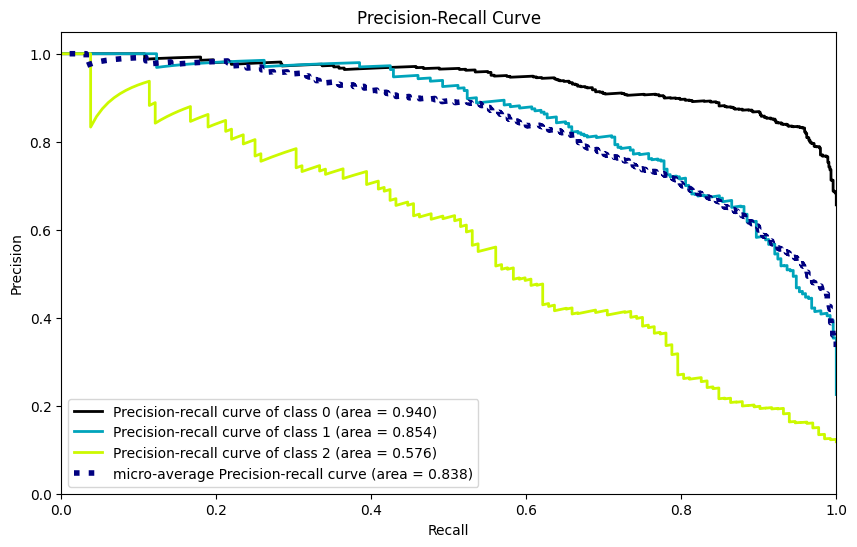

In [140]:
operations_xgb = [("OrdinalEncoder", column_trans_xg),
                  ("XGB_model",XGBClassifier(colsample_bytree=0.85,
                                             learning_rate=0.05,
                                             max_depth=3,
                                             n_estimators=40,
                                             subsample=0.8,
                                             random_state=101))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_xg, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_xg, y_pred_proba)
plt.show()

In [141]:
y_test_xgb_dummies = pd.get_dummies(y_test_xg).values
average_precision_score(y_test_xgb_dummies[:, 2], y_pred_proba[:, 2])

0.5763634410409416

In [142]:
y_pred = xg_grid.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 2], y_pred_proba[:, 2])
xgb_f1 = f1_score(y_test_xg, y_pred, average=None, labels=[2])
xgb_recall = recall_score(y_test_xg, y_pred, average=None, labels=[2])

---
---

---
---

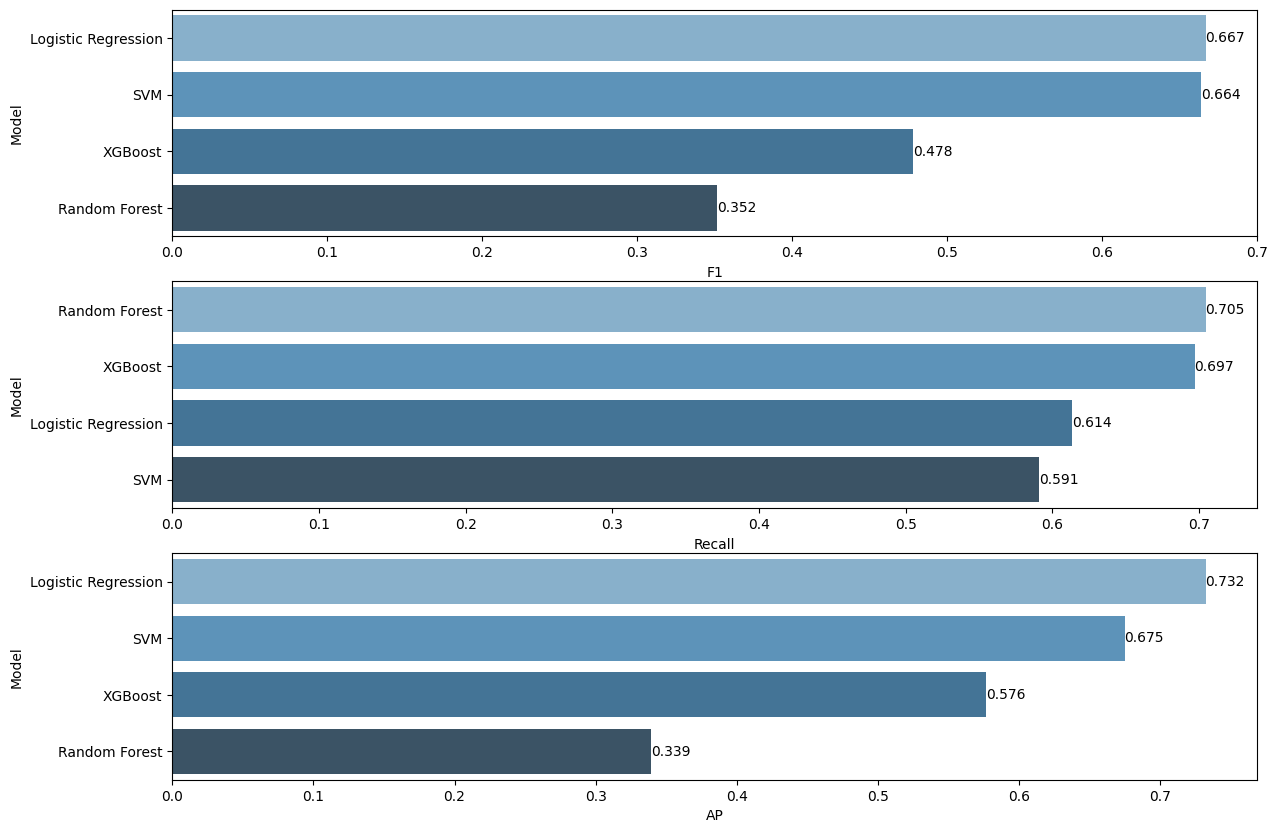

In [143]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
#ax.bar_label(ax.containers[0], fmt="%.3f")
for label in ax.containers:
    ax.bar_label(label, fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
for label in ax.containers:
    ax.bar_label(label, fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
for label in ax.containers:
    ax.bar_label(label, fmt="%.3f")
    
plt.show();

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [144]:
# according to the comparison chart, the logistic regression model is the one with the best in performance
# and because the dataset is imbalanced, we can not use the accuracy to evaluate the model
# therefore, we will use other metrics like matthews and kappa_score

In [145]:
y_pred = grid_model_logis.predict(X_test)
y_pred

array([2, 1, 3, ..., 1, 2, 1], dtype=int64)

In [146]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.8050347837926662

In [147]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.8041885462040692

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [148]:
#!pip install imblearn

In [149]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as impip

In [150]:
#prepare the column transformers for the SMOTE
X_train_ou_trans = column_trans_logi.fit_transform(X_train)

### way 1

#### over

In [151]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ou_trans, y_train)

In [152]:
X_train_over.shape

(8805, 181)

In [153]:
y_train_over.value_counts()

DODRace
3    2935
1    2935
2    2935
Name: count, dtype: int64

#### under

In [154]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ou_trans, y_train)

In [155]:
X_train_under.shape

(1581, 181)

In [156]:
y_train_under.value_counts()

DODRace
1    527
2    527
3    527
Name: count, dtype: int64

### way 2

In [157]:
#default sampling strategy 'auto' -> resample all but majority class

over_1 = SMOTE(sampling_strategy={2:3669, 3: 3669}, random_state = 101)
under_2 = RandomUnderSampler(sampling_strategy = {1: 1261}, random_state = 101)
over_2 = SMOTE(sampling_strategy={3: 1261}, random_state = 101)

In [158]:
X_resampled_over_1, y_resampled_over_1 = over_1.fit_resample(X_train_ou_trans, y_train)

In [159]:
X_resampled_under_2, y_resampled_under_2 = under_2.fit_resample(X_train_ou_trans, y_train)
X_resampled_over_2, y_resampled_over_2 = over_2.fit_resample(X_train_ou_trans, y_train)

## Logistic Regression Over/ Under Sampling

### over

In [160]:
steps_over = [("cat_scaler", column_trans_logi),
              ("num_scaler", stand_scale),
              ('over', over),
              ('logistic', LogisticRegression(C = 0.01,
                                              penalty = 'l2', 
                                              class_weight = 'balanced',
                                              solver = 'lbfgs'))]
pipe_over_log = impip(steps= steps_over)
pipe_over_log.fit(X_train, y_train)

Pipeline(steps=[('cat_scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation', 'PrimaryMOS'], dtype='object')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Combat '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Arms',
                                                                              'Combat '
                                                                              'Service '
                                                                              'Support'],
                                                                             ['Army '
                                                                              'Reserve',
                                                                              'Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Branch', 'Component'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('num_scaler', StandardScaler()), ('over', SMOTE()),
                ('logistic',
                 LogisticRegression(C=0.01, class_weight='balanced'))])

In [161]:
eval_metric(pipe_over_log, X_train, y_train, X_test, y_test)

Test_Set
[[630  12  92]
 [ 13 226  13]
 [ 17   8 107]]
              precision    recall  f1-score   support

           1       0.95      0.86      0.90       734
           2       0.92      0.90      0.91       252
           3       0.50      0.81      0.62       132

    accuracy                           0.86      1118
   macro avg       0.79      0.86      0.81      1118
weighted avg       0.89      0.86      0.87      1118


Train_Set
[[2575   49  311]
 [  44  926   39]
 [  77   27  423]]
              precision    recall  f1-score   support

           1       0.96      0.88      0.91      2935
           2       0.92      0.92      0.92      1009
           3       0.55      0.80      0.65       527

    accuracy                           0.88      4471
   macro avg       0.81      0.87      0.83      4471
weighted avg       0.90      0.88      0.88      4471



In [162]:
scores = cross_validate(pipe_over_log,
                        X_train, 
                        y_train, 
                        scoring=my_hisp_scoring, 
                        cv=10, 
                        n_jobs=-1, 
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hisp    0.506
train_precision_Hisp   0.551
test_recall_Hisp       0.734
train_recall_Hisp      0.806
test_f1_Hisp           0.598
train_f1_Hisp          0.654
dtype: float64

### under

In [163]:
steps_under = [("cat_scaler", column_trans_logi),
                    ("num_scaler", stand_scale),
                    ('under', under), 
                    ('logistic', LogisticRegression(C = 0.01,
                                                    penalty = 'l2', 
                                                    class_weight = 'balanced',
                                                    solver = 'lbfgs'))]

pipe_under_log = impip(steps= steps_under)
pipe_under_log.fit(X_train, y_train)

Pipeline(steps=[('cat_scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation', 'PrimaryMOS'], dtype='object')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Combat '
                                                                              'Support',
                                                                              'Combat '
                                                                              'Arms',
                                                                              'Combat '
                                                                              'Service '
                                                                              'Support'],
                                                                             ['Army '
                                                                              'Reserve',
                                                                              'Regular '
                                                                              'Army',
                                                                              'Army '
                                                                              'National '
                                                                              'Guard']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Branch', 'Component'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('num_scaler', StandardScaler()),
                ('under', RandomUnderSampler()),
                ('logistic',
                 LogisticRegression(C=0.01, class_weight='balanced'))])

In [164]:
eval_metric(pipe_under_log, X_train, y_train, X_test, y_test)

Test_Set
[[592  21 121]
 [ 15 221  16]
 [ 16   6 110]]
              precision    recall  f1-score   support

           1       0.95      0.81      0.87       734
           2       0.89      0.88      0.88       252
           3       0.45      0.83      0.58       132

    accuracy                           0.83      1118
   macro avg       0.76      0.84      0.78      1118
weighted avg       0.88      0.83      0.84      1118


Train_Set
[[2454   80  401]
 [  44  911   54]
 [  73   24  430]]
              precision    recall  f1-score   support

           1       0.95      0.84      0.89      2935
           2       0.90      0.90      0.90      1009
           3       0.49      0.82      0.61       527

    accuracy                           0.85      4471
   macro avg       0.78      0.85      0.80      4471
weighted avg       0.89      0.85      0.86      4471



In [165]:
scores = cross_validate(pipe_under_log,
                        X_train, 
                        y_train, 
                        scoring=my_hisp_scoring, 
                        cv=10, 
                        n_jobs=-1, 
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hisp    0.456
train_precision_Hisp   0.486
test_recall_Hisp       0.763
train_recall_Hisp      0.818
test_f1_Hisp           0.570
train_f1_Hisp          0.609
dtype: float64

## SHAP

In [166]:
#pip install shap
import shap

In [181]:
#the Shap doesn't work with the model fitted with pipeline
X_train_shap_trans = column_trans_logi.fit_transform(X_train)
X_test_shap_trans = column_trans_logi.transform(X_test)

model_shap = LogisticRegression(class_weight="balanced",
                                C = 0.01,
                                max_iter=10000,
                                random_state=101,
                                penalty='l2',
                                solver='lbfgs')

model_shap.fit(X_train_shap_trans, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=10000,
                   random_state=101)

In [182]:
eval_metric(model_shap, X_train_shap_trans, y_train, X_test_shap_trans, y_test)

Test_Set
[[588  17 129]
 [  5 229  18]
 [ 20  13  99]]
              precision    recall  f1-score   support

           1       0.96      0.80      0.87       734
           2       0.88      0.91      0.90       252
           3       0.40      0.75      0.52       132

    accuracy                           0.82      1118
   macro avg       0.75      0.82      0.76      1118
weighted avg       0.88      0.82      0.84      1118


Train_Set
[[2434   71  430]
 [  25  936   48]
 [  83   31  413]]
              precision    recall  f1-score   support

           1       0.96      0.83      0.89      2935
           2       0.90      0.93      0.91      1009
           3       0.46      0.78      0.58       527

    accuracy                           0.85      4471
   macro avg       0.77      0.85      0.80      4471
weighted avg       0.89      0.85      0.86      4471



In [184]:
operations = [("cat_scaler", column_trans_logi),
              ("num_scaler", stand_scale),
              ("logistic", LogisticRegression(class_weight="balanced",
                                max_iter=10000,
                                random_state=101,
                                penalty='l2',
                                solver='lbfgs'))]

model_pip_shap = Pipeline(steps=operations)

scores = cross_validate(model_pip_shap,
                        X_train, 
                        y_train, 
                        scoring=my_hisp_scoring, 
                        cv=5, 
                        n_jobs=-1, 
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hisp    0.466
train_precision_Hisp   0.555
test_recall_Hisp       0.731
train_recall_Hisp      0.876
test_f1_Hisp           0.569
train_f1_Hisp          0.679
dtype: float64

In [185]:
features = column_trans_logi.get_feature_names_out()
features

array(['SubjectsBirthLocation_Africa', 'SubjectsBirthLocation_Alabama',
       'SubjectsBirthLocation_Alaska', 'SubjectsBirthLocation_Arizona',
       'SubjectsBirthLocation_Arkansas', 'SubjectsBirthLocation_Asia',
       'SubjectsBirthLocation_California',
       'SubjectsBirthLocation_Colorado',
       'SubjectsBirthLocation_Connecticut',
       'SubjectsBirthLocation_Delaware',
       'SubjectsBirthLocation_District of Columbia',
       'SubjectsBirthLocation_Europe', 'SubjectsBirthLocation_Florida',
       'SubjectsBirthLocation_Georgia', 'SubjectsBirthLocation_Hawaii',
       'SubjectsBirthLocation_Idaho', 'SubjectsBirthLocation_Illinois',
       'SubjectsBirthLocation_Indiana', 'SubjectsBirthLocation_Iowa',
       'SubjectsBirthLocation_Kansas', 'SubjectsBirthLocation_Kentucky',
       'SubjectsBirthLocation_Louisiana', 'SubjectsBirthLocation_Maine',
       'SubjectsBirthLocation_Maryland',
       'SubjectsBirthLocation_Massachusetts',
       'SubjectsBirthLocation_Michigan',
   

In [241]:
np.__version__

'1.26.1'

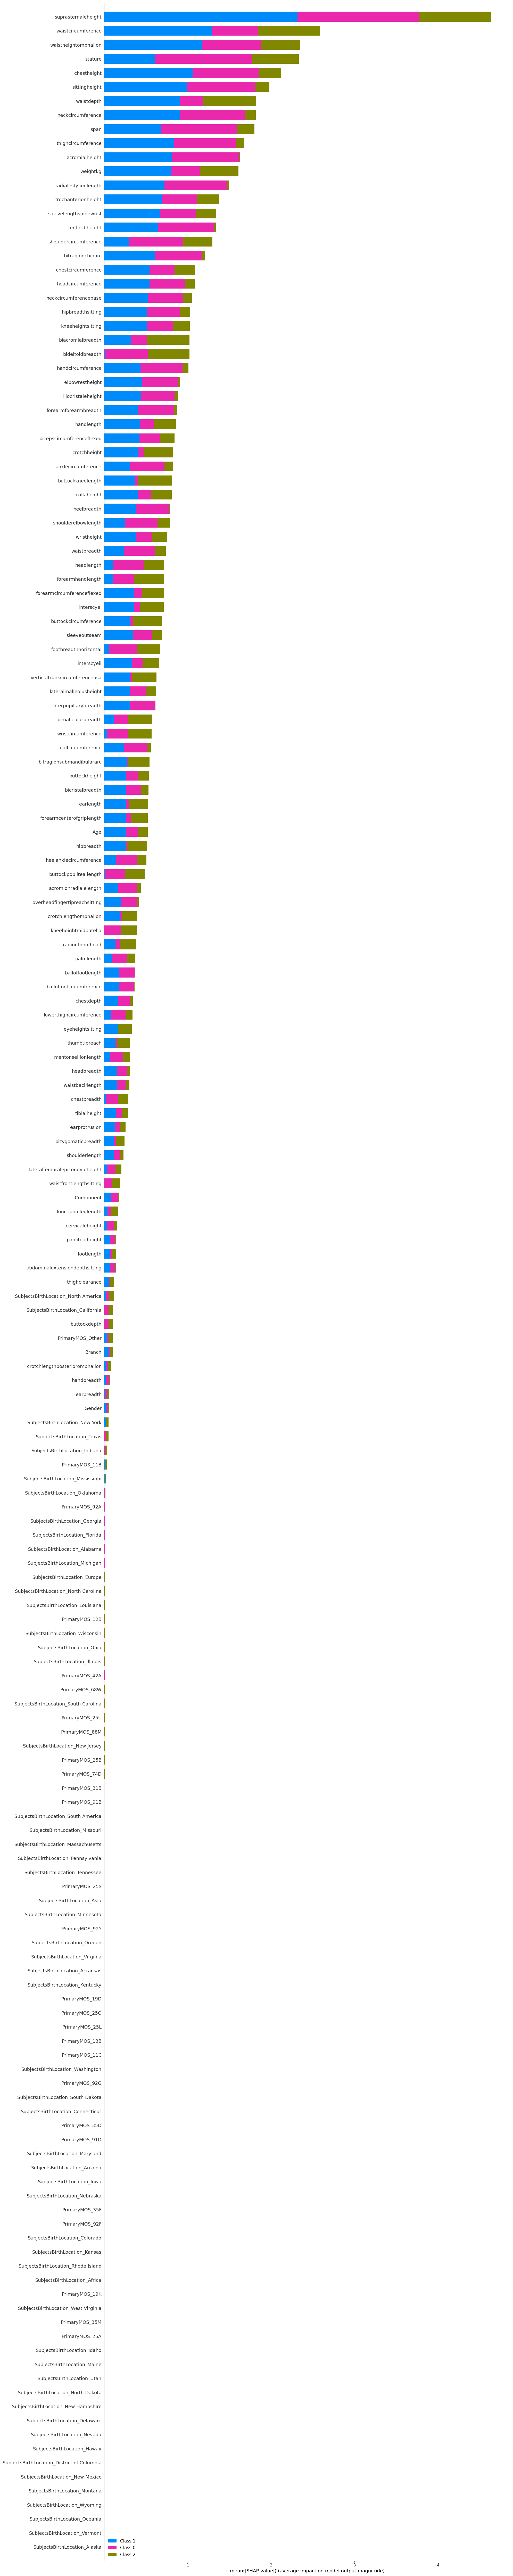

In [186]:
explainer = shap.LinearExplainer(model_shap, X_train_shap_trans)  # LinearExplainer

shap_values = explainer.shap_values(X_test_shap_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)

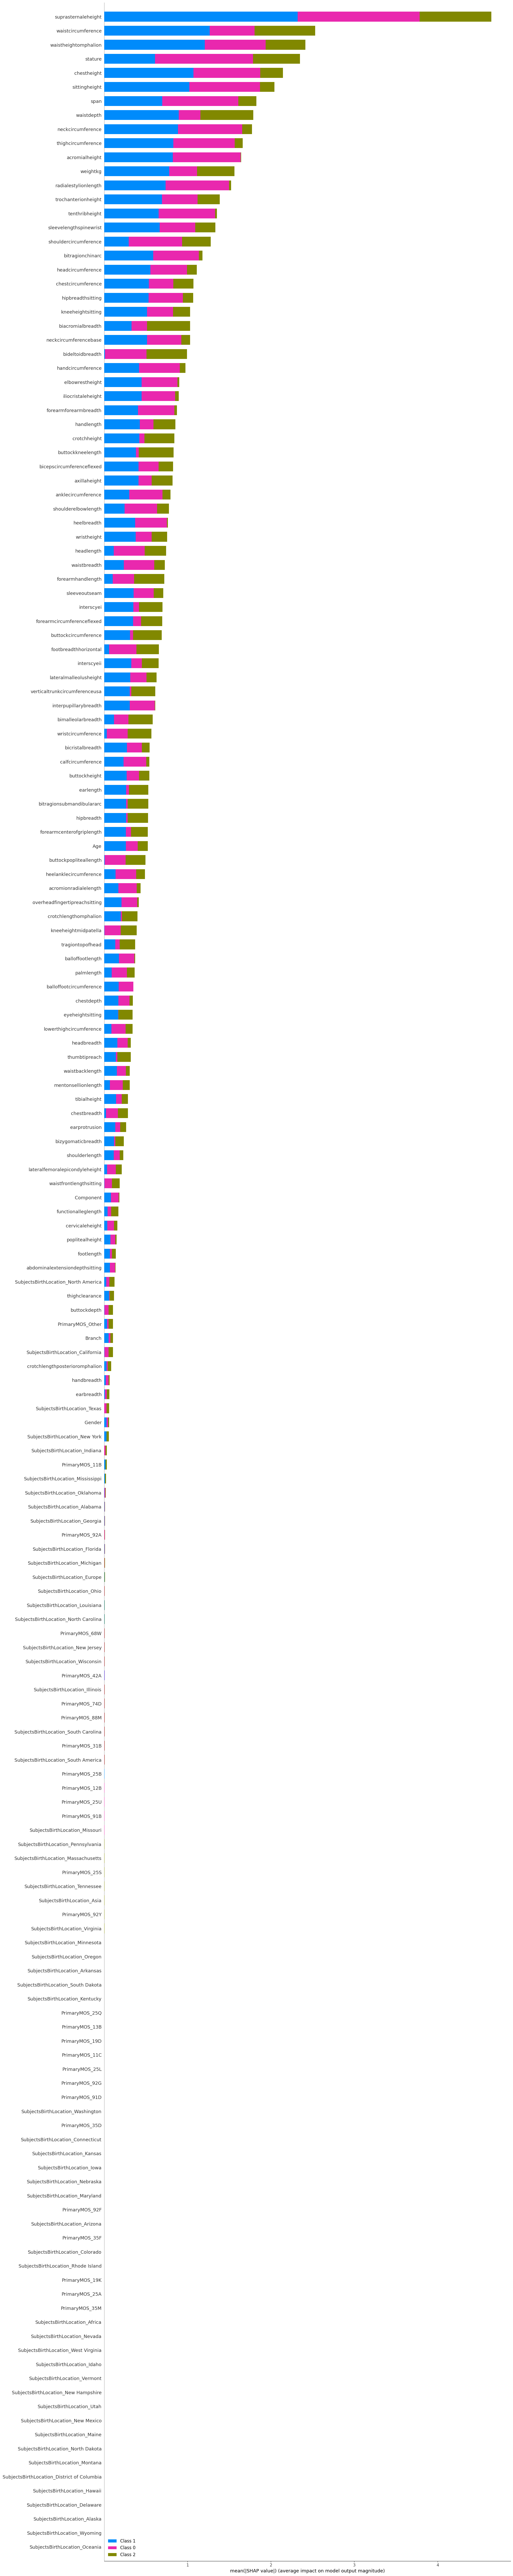

In [187]:
explainer = shap.Explainer(model_shap, X_train_shap_trans)

shap_values = explainer.shap_values(X_train_shap_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)
df.kneeheightmidpatella
df.tragiontopofhead
df.crotchheight
df.buttockkneelength
df.waistfrontlengthsitting
df.functionalleglength
df.SubjectsBirthLocation

In [215]:
hispanic = ["suprasternaleheight",
            "waistcircumference",
            "stature",
            "waistdepth",
            "waistheightomphalion",
            "weightkg",
            "biacromialbreadth",
            "bideltoidbreadth",
            "shouldercircumference",
            "buttockkneelength",
            "forearmcenterofgriplength",
            "bimalleolarbreadth",
            "waistcircumference",
            "Age",
            "earlength",
            "hipbreadth",
            "bitragionsubmandibulararc",
            "kneeheightmidpatella",
            "tragiontopofhead",
            "crotchheight",
            "waistfrontlengthsitting",
            "functionalleglength"]

In [216]:
X2 = x[hispanic]
X2.head()

suprasternaleheight  waistcircumference  stature  waistdepth  \
0                 1280                 850     1560         217   
1                 1372                 708     1665         168   
2                 1383                 727     1711         159   
3                 1358                 923     1660         235   
4                 1292                1163     1572         300   

   waistheightomphalion  weightkg  biacromialbreadth  bideltoidbreadth  \
0                   942       657                373               466   
1                  1032       534                372               430   
2                  1035       663                397               450   
3                   999       782                384               484   
4                   911       886                378               525   

   shouldercircumference  buttockkneelength  forearmcenterofgriplength  \
0                   1062                587                        316   
1                   1014                583                        341   
2                   1049                583                        343   
3                   1121                599                        331   
4                   1151                607                        339   

   bimalleolarbreadth  waistcircumference  Age  earlength  hipbreadth  \
0                  65                 850   26         65         345   
1                  64                 708   21         60         315   
2                  69                 727   23         65         356   
3                  68                 923   22         62         337   
4                  67                1163   45         65         448   

   bitragionsubmandibulararc  kneeheightmidpatella  tragiontopofhead  \
0                        301                   435               110   
1                        270                   483               125   
2                        270                   470               129   
3                        294                   469               125   
4                        295                   440               116   

   crotchheight  waistfrontlengthsitting  functionalleglength  
0           759                      345                 1028  
1           835                      329                 1117  
2           821                      367                 1060  
3           804                      371                 1069  
4           726                      380                 1039

In [217]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify=y)

In [219]:
operations_shap = [("num_scaler", stand_scale),
                    ("logistic", LogisticRegression(class_weight="balanced",
                                max_iter=10000,
                                random_state=101,
                                penalty='l2',
                                solver='lbfgs'))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('num_scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [220]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[489  56 189]
 [ 20 211  21]
 [ 30  15  87]]
              precision    recall  f1-score   support

           1       0.91      0.67      0.77       734
           2       0.75      0.84      0.79       252
           3       0.29      0.66      0.41       132

    accuracy                           0.70      1118
   macro avg       0.65      0.72      0.65      1118
weighted avg       0.80      0.70      0.73      1118


Train_Set
[[1916  246  773]
 [  80  843   86]
 [ 128   65  334]]
              precision    recall  f1-score   support

           1       0.90      0.65      0.76      2935
           2       0.73      0.84      0.78      1009
           3       0.28      0.63      0.39       527

    accuracy                           0.69      4471
   macro avg       0.64      0.71      0.64      4471
weighted avg       0.79      0.69      0.72      4471



In [221]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(model, 
                        X_train2, 
                        y_train2, 
                        scoring=my_hisp_scoring, 
                        cv=5, 
                        n_jobs=-1, 
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hisp    0.261
train_precision_Hisp   0.280
test_recall_Hisp       0.596
train_recall_Hisp      0.632
test_f1_Hisp           0.363
train_f1_Hisp          0.388
dtype: float64

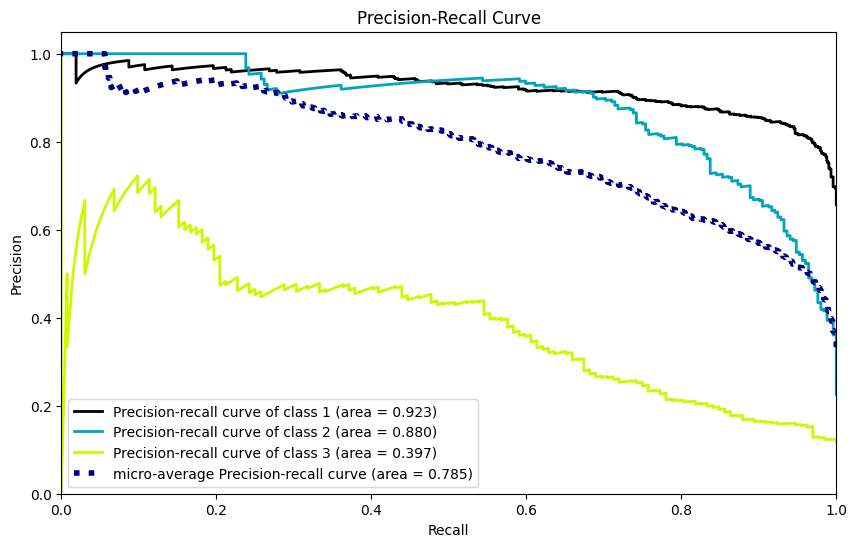

In [222]:
y_pred_proba = pipe_shap_model.predict_proba(X_test2)

plot_precision_recall(y_test2, y_pred_proba)
plt.show();

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

# the End

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___